## Overview - Data Science Project by Maximilian Tornow
### 1 Data clean up / transformation
### 2 Exploratory analysis
#### 2.1 Importing the data
#### 2.2 Distribution analysis
#### 2.3 How does the data look over time?
##### 2.3.1 General plots
##### 2.3.2 Time series analysis
#### 2.4 How many NaN values are there in the data?
### 3 Data modeling
#### 3.1 Mean modeling (Naiv model)
#### 3.2 Linear regression
#### 3.3 Ridge regression
##### 3.3.1 small alpha
##### 3.3.2 large alpha
##### 3.3.3 optimized alpha
#### 3.4 Lasso regression
#### 3.5 Linear regression (Recursive feature elimination)
#### 3.6 Lasso regression (Recursive feature elimination)
#### 3.7 XGBoosting
#### 3.8 Negative Binomial Regression
#### 3.9 Facebook Prophet - Combined Data
#### 3.10 PCA
#### 3.11 Autocorrelation


________________________________________________

### 1. Data clean up / transformation

In [1]:
#Importing of needed libraries
#General
import numpy as np
import pandas as pd 

#Plotting
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from xgboost import plot_tree
import graphviz as graphviz

#Pipeline and modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

from scipy import stats

from xgboost import XGBRegressor

import statsmodels.api as sm
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

from fbprophet import Prophet

G:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### 2. Exploratory Data Analysis

#### 2.1 Importing the data

In [2]:
X = pd.read_csv('Input Data/Dengue_Input_Train.csv', sep=',')
y = pd.read_csv('Input Data/Dengue_Input_Labels.csv', sep=',')

In [3]:
X.head(3)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.12260,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.16990,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.03225,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4


#### 2.2 Distribution analysis

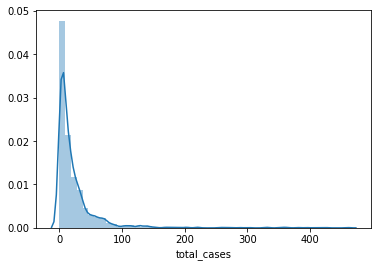

In [4]:
#General distribution analysis
sns.distplot(y.total_cases)
plt.savefig('general-distribution.png', bbox_inches='tight')

Mean:24.68 red
Standard Deviation:43.6
Median:12.0 black
Median Absolute Deviation:23.0


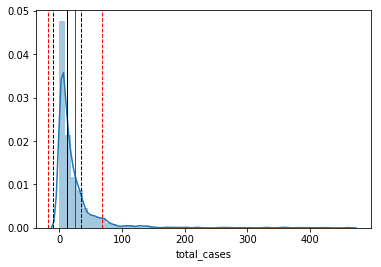

In [5]:
#General distribution analysis - added mean and median to graph
sns.distplot(y.total_cases)

print('Mean:' + str(round(y.total_cases.mean(),2)) + ' red')
print('Standard Deviation:' + str(round(y.total_cases.std(),2)))
print('Median:' + str(round(y.total_cases.median(),2)) + ' black')
print('Median Absolute Deviation:' + str(round(y.total_cases.mad(),2)))

plt.axvline(x=y.total_cases.mean(), color='r', linestyle='-', lw=1)
plt.axvline(x=y.total_cases.mean()-y.total_cases.std(), color='r', linestyle='--', lw=1)
plt.axvline(x=y.total_cases.mean()+y.total_cases.std(), color='r', linestyle='--', lw=1)

plt.axvline(x=y.total_cases.median(), color='k', linestyle='-', lw=1)
plt.axvline(x=y.total_cases.median()-y.total_cases.mad(), color='k', linestyle='--', lw=1)
plt.axvline(x=y.total_cases.median()+y.total_cases.mad(), color='k', linestyle='--', lw=1)

plt.savefig('mean-median-distribution.png', bbox_inches='tight')

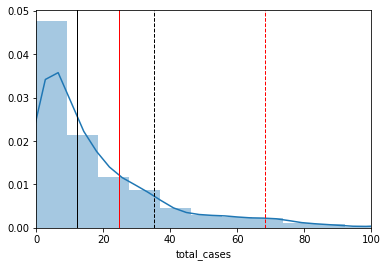

In [6]:
#General distribution analysis - xaxis limit (plot only)
g = sns.distplot(y.total_cases)
g.set(xlim=(0, 100))

plt.axvline(x=y.total_cases.mean(), color='r', linestyle='-', lw=1)
plt.axvline(x=y.total_cases.mean()-y.total_cases.std(), color='r', linestyle='--', lw=1)
plt.axvline(x=y.total_cases.mean()+y.total_cases.std(), color='r', linestyle='--', lw=1)

plt.axvline(x=y.total_cases.median(), color='k', linestyle='-', lw=1)
plt.axvline(x=y.total_cases.median()-y.total_cases.mad(), color='k', linestyle='--', lw=1)
plt.axvline(x=y.total_cases.median()+y.total_cases.mad(), color='k', linestyle='--', lw=1)

plt.savefig('mean-median-distribution_zoomed.png', bbox_inches='tight')

#### 2.3 How does the data look like over time?

##### 2.3.1 General Plots

In [7]:
#Import data (labels only)
df = pd.read_csv('Input Data/Dengue_Input_Labels.csv', sep=',')

#Method to join to strings for adding extra labels
def str_join(df, sep, *cols):
    from functools import reduce
    return reduce(lambda x, y: x.astype(str).str.cat(y.astype(str), sep=sep), 
        [df[col] for col in cols])

#Combining year and week to a time indicator
df['time'] = str_join(df, '_', 'year', 'weekofyear')

#Combining time and city to a unique identifier
df['unique'] = str_join(df, '_', 'city', 'time')
df.head()

,city,year,weekofyear,total_cases,time,unique
0,sj,1990,18,4,1990_18,sj_1990_18
1,sj,1990,19,5,1990_19,sj_1990_19
2,sj,1990,20,4,1990_20,sj_1990_20
3,sj,1990,21,3,1990_21,sj_1990_21
4,sj,1990,22,6,1990_22,sj_1990_22


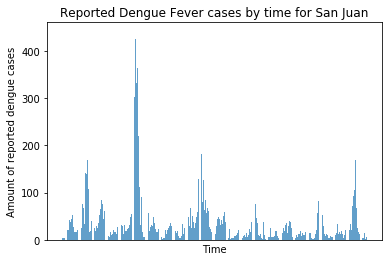

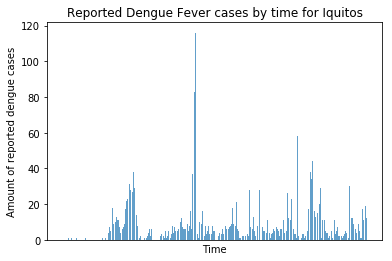

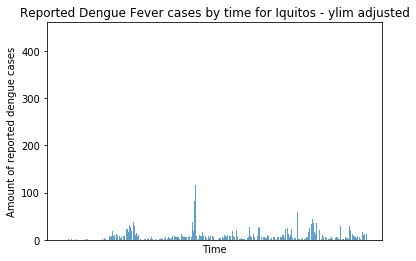

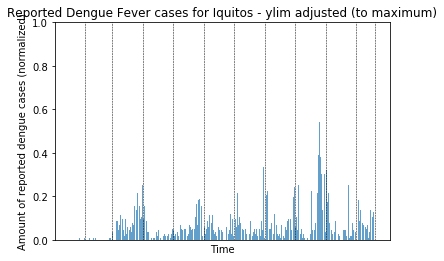

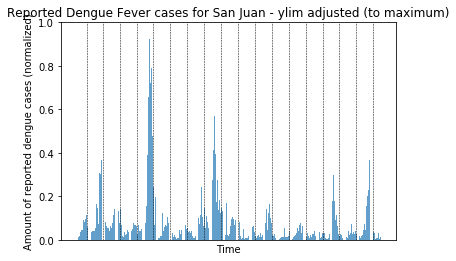

In [8]:
#Plot the labels for each period
labels_array_sj= []
labels_array_iq= []

df_sj = df.loc[df['city'] == 'sj']
df_iq = df.loc[df['city'] == 'iq'] 
    
for i in df_sj['total_cases']:
    labels_array_sj.append(i)

for i in df_iq['total_cases']:
    labels_array_iq.append(i)
    
#xaxis_sj = np.arange(0, len(labels_array_sj),1)
xaxis_sj = df_sj['time']
yaxis_sj = labels_array_sj

xaxis_iq = df_iq['time']
yaxis_iq = labels_array_iq

#Graph reported dengue cases San Juan linear scale
plt.bar(xaxis_sj, yaxis_sj, align='center', alpha=0.7)
plt.ylabel('Amount of reported dengue cases')
plt.xlabel('Time')
plt.title('Reported Dengue Fever cases by time for San Juan')
plt.ylim(0,max(yaxis_sj))
plt.xticks([])
plt.savefig('sj_total_unscaled.png', bbox_inches='tight')
plt.show() 

#Graph reported dengue cases Iquitos linear scale
plt.bar(xaxis_iq, yaxis_iq, align='center', alpha=0.7)
plt.ylabel('Amount of reported dengue cases')
plt.xlabel('Time')
plt.title('Reported Dengue Fever cases by time for Iquitos')
plt.xticks([])
plt.savefig('iq_total_unscaled.png', bbox_inches='tight')
plt.show() 

#Graph reported dengue cases Iquitos linear scale - scaled to the same dimension (y) as San Juan
plt.bar(xaxis_iq, yaxis_iq, align='center', alpha=0.7)
plt.ylabel('Amount of reported dengue cases')
plt.xlabel('Time')
plt.title('Reported Dengue Fever cases by time for Iquitos - ylim adjusted')
plt.ylim(0,max(yaxis_sj))
plt.xticks([])
plt.savefig('iq_total_sj-scale.png', bbox_inches='tight')
plt.show() 

#Graph reported dengue cases Iquitos linear scale - scaled to the maximum of Iquitos dengue cases
yaxis_iq_adjusted = [] 
for i in yaxis_iq:
    yaxis_iq_adjusted.append(i/max(yaxis_iq))
plt.bar(xaxis_iq, yaxis_iq_adjusted, align='center', alpha=0.7)
plt.ylabel('Amount of reported dengue cases (normalized)')
plt.xlabel('Time')
plt.title('Reported Dengue Fever cases for Iquitos - ylim adjusted (to maximum)')
plt.ylim(0,1)
plt.xticks([])
xcoords = ['2000_51','2001_51','2002_51','2003_51','2004_51','2005_51','2006_51','2007_51',
           '2008_51','2009_51','2010_51']
for xc in xcoords:
    plt.axvline(x=xc, color='k', linestyle='--', lw=0.5)
plt.savefig('iq_total_normalized.png', bbox_inches='tight')
plt.show()

#Graph reported dengue cases Iquitos linear scale - scaled to the maximum of San Juan dengue cases
yaxis_sj_adjusted = [] 
for i in yaxis_sj:
    yaxis_sj_adjusted.append(i/max(yaxis_sj))
plt.bar(xaxis_sj, yaxis_sj_adjusted, align='center', alpha=0.7)
plt.ylabel('Amount of reported dengue cases (normalized)')
plt.xlabel('Time')
plt.title('Reported Dengue Fever cases for San Juan - ylim adjusted (to maximum)')
plt.ylim(0,1)
plt.xticks([])
xcoords = ['1990_51','1991_51','1992_51','1993_51','1994_51','1995_51','1996_51','1997_51','1998_51','1999_51',
           '2000_51','2001_51','2002_51','2003_51','2004_51','2005_51','2006_51','2007_51']
for xc in xcoords:
    plt.axvline(x=xc, color='k', linestyle='--', lw=0.5)
plt.savefig('sj_total_normalized.png', bbox_inches='tight')
plt.show() 


##### 2.3.2 Time series analysis

In [9]:
#Definition of a method that extracts the data for a year for one city
def extract_year(year, city):
    df = y[y['year'] == year][y['city'] == city]
    df.plot.bar('weekofyear', 'total_cases', legend=False, title = str(year) + '_' +city)
    
#Definition of a method that extracts the data for a year for one city - added option for scaling
def extract_year_ylim(year, city, ylim):
    df = y[y['year'] == year][y['city'] == city]
    df.plot.bar('weekofyear', 'total_cases', legend=False, title = str(year) + '_' +city, ylim=ylim)
    
#Definition of a method that extracts the data for a year for one city - added saveing of file
def extract_year_save(year, city, savename):
    df = y[y['year'] == year][y['city'] == city]
    df.plot.bar('weekofyear', 'total_cases', legend=False, title = str(year) + '_' +city+ '_' +savename)
    plt.savefig(str(year) + '_'+ city +'_' + savename +'.png', bbox_inches='tight')
    
#Definition of a method that extracts the data for a year for one city - added option for scaling
def extract_year_ylim_save(year, city, ylim,savename):
    df = y[y['year'] == year][y['city'] == city]
    df.plot.bar('weekofyear', 'total_cases', legend=False, title = str(year) + '_' +city+ '_' +savename, ylim=ylim)
    plt.savefig(str(year) + '_'+ city +'_' + savename +'.png', bbox_inches='tight')
    
X = pd.read_csv('Input Data/Dengue_Input_Train.csv', sep=',')
y = pd.read_csv('Input Data/Dengue_Input_Labels.csv', sep=',')

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
G:\Anaconda\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


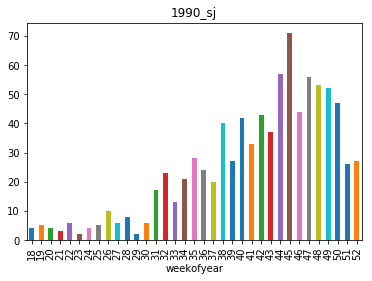

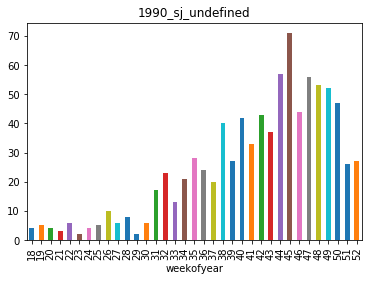

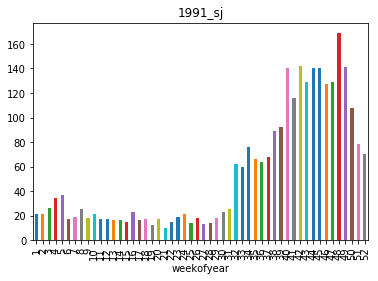

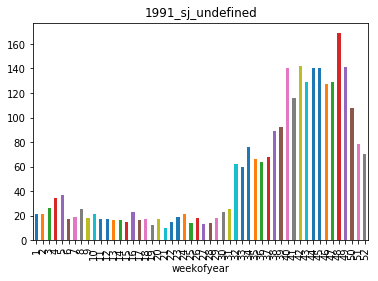

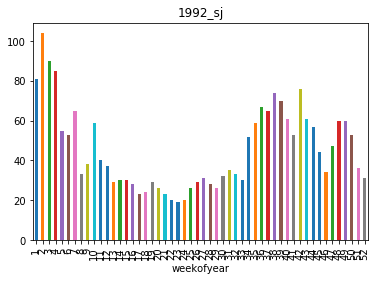

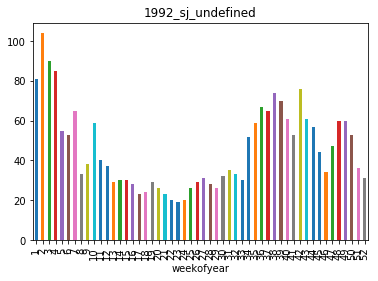

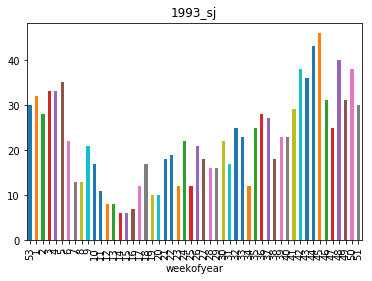

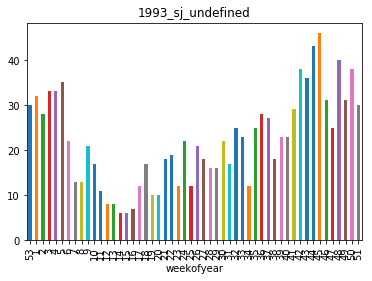

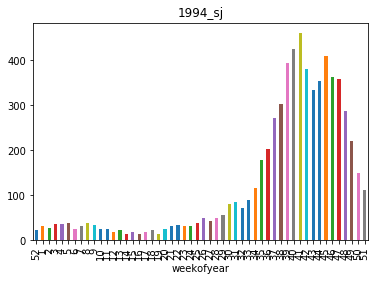

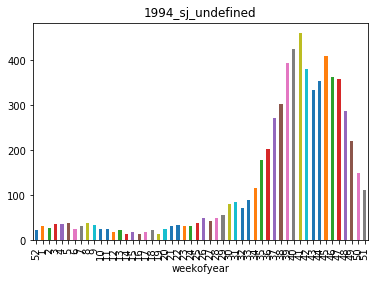

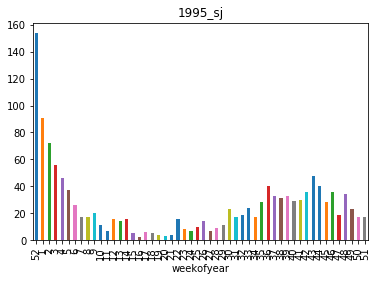

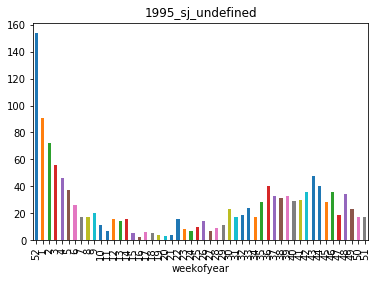

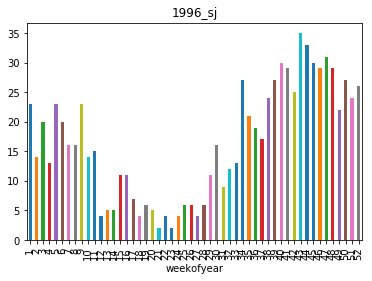

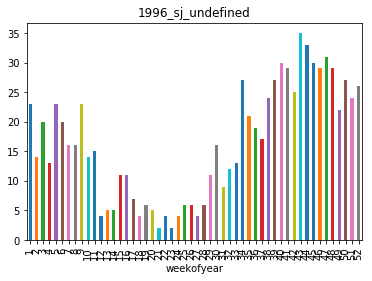

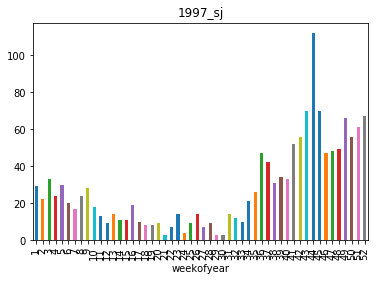

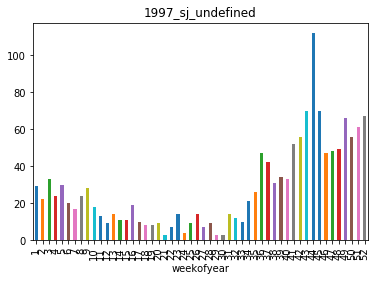

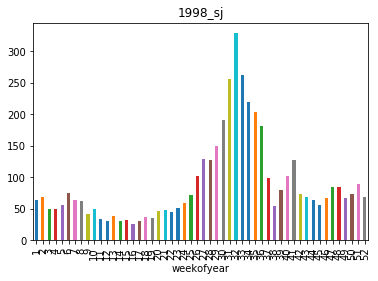

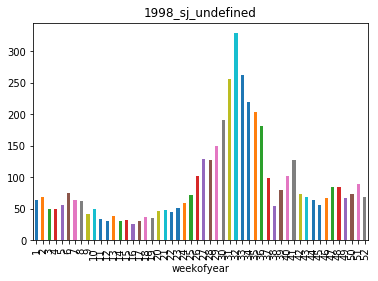

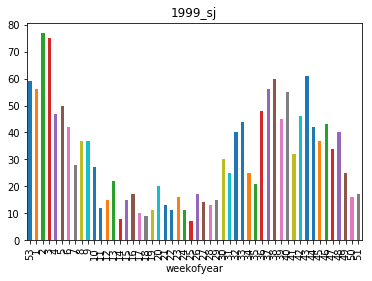

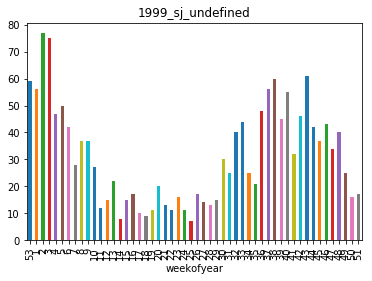

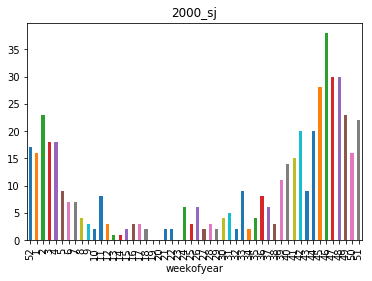

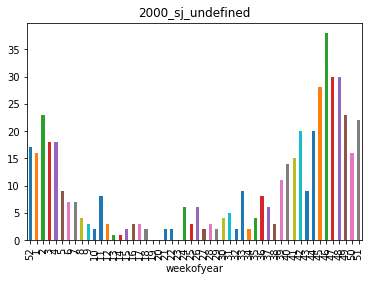

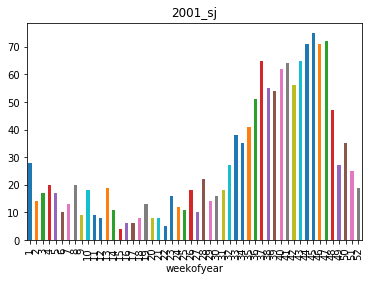

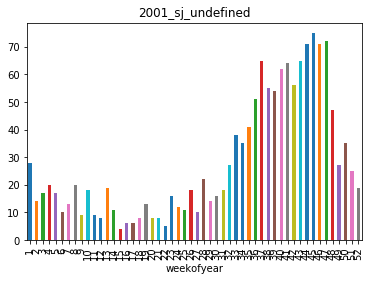

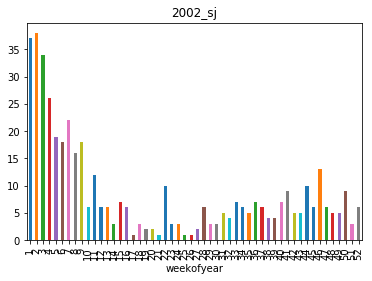

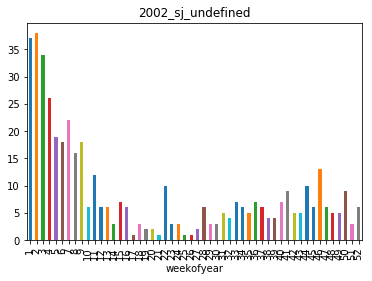

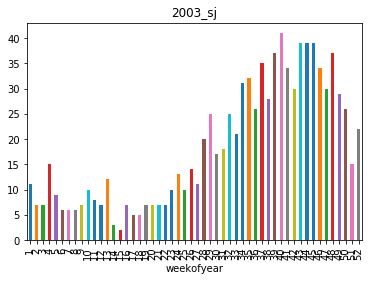

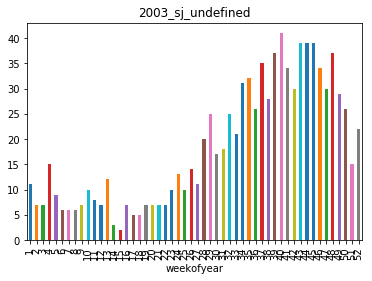

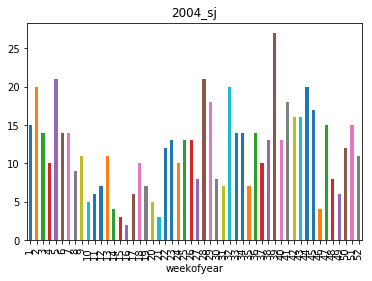

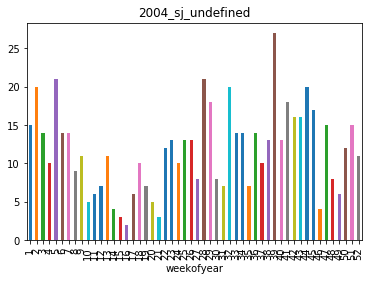

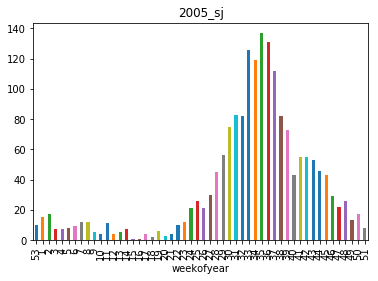

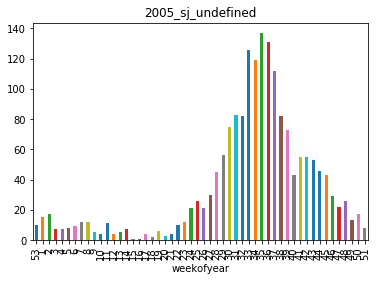

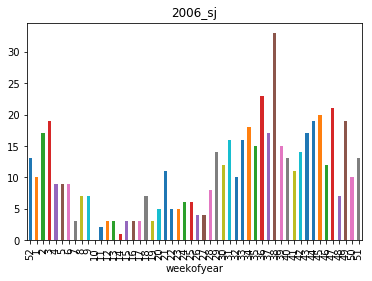

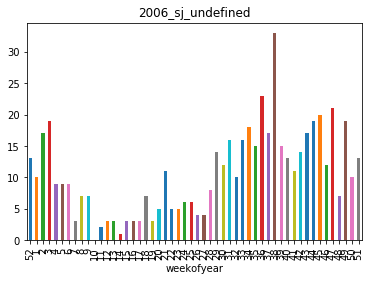

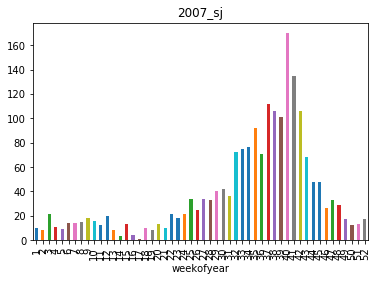

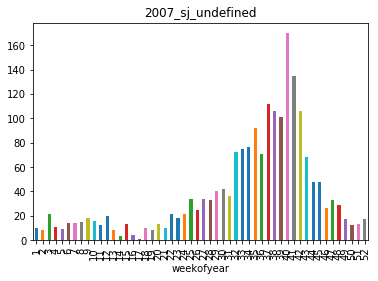

In [10]:
#Plot all years for San Juan
for i in range(1990,2008):
    extract_year(i,'sj')
    extract_year_save(i,'sj','undefined')

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
G:\Anaconda\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


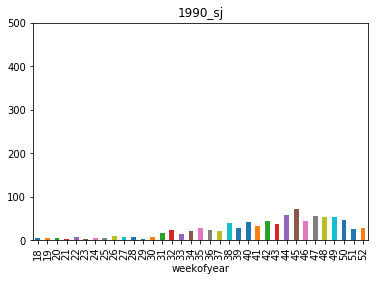

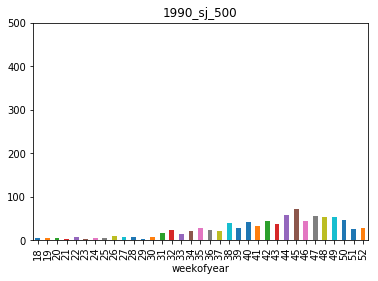

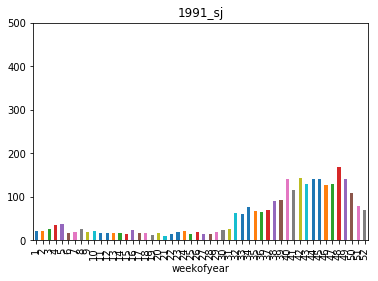

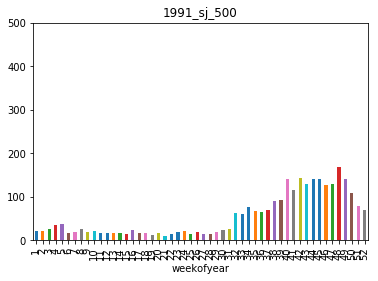

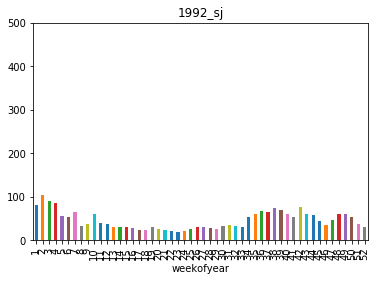

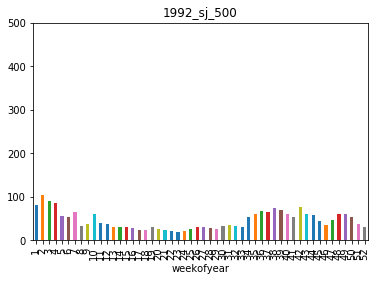

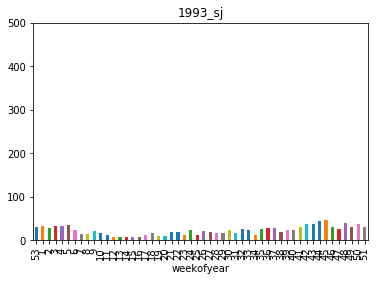

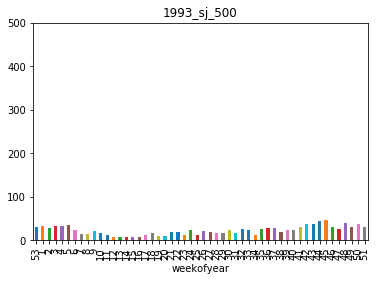

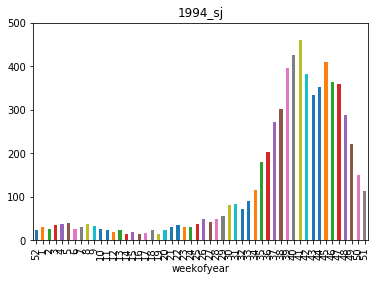

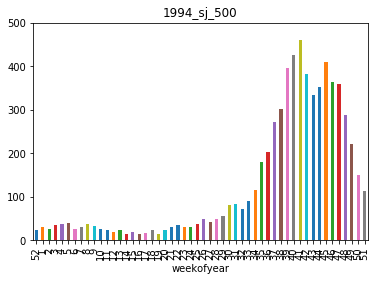

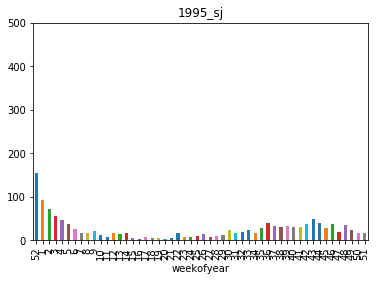

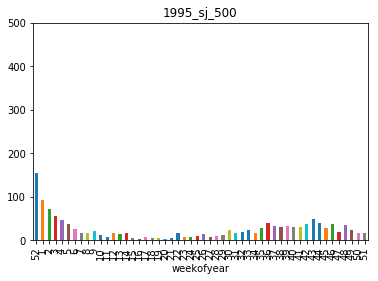

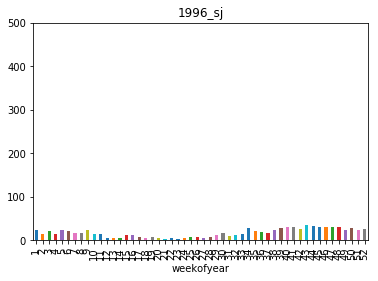

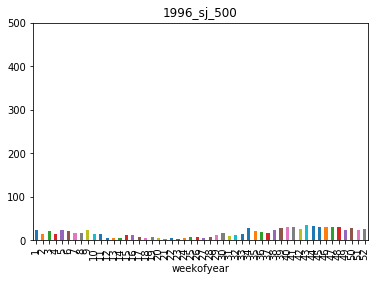

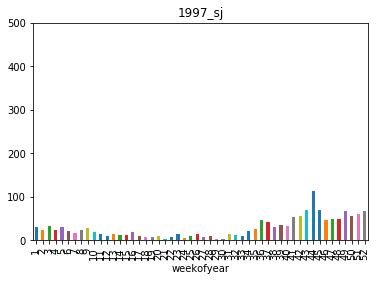

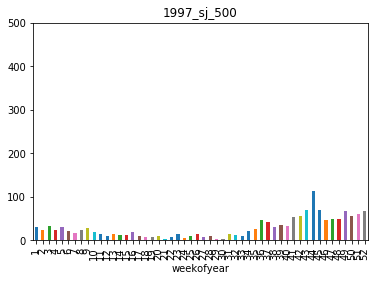

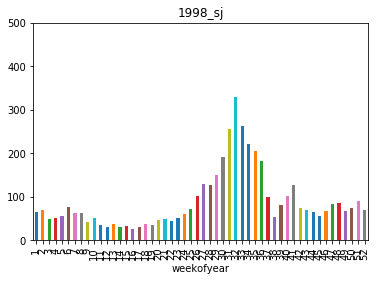

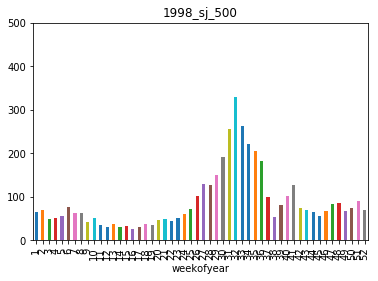

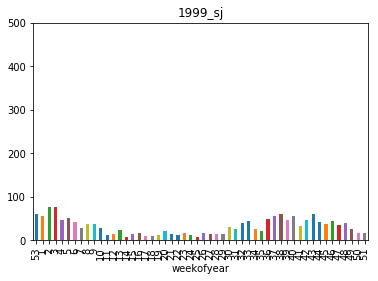

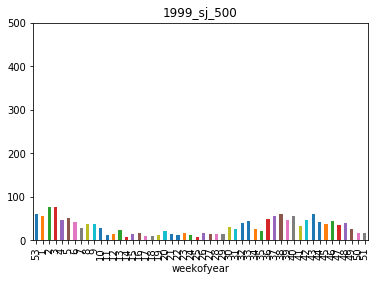

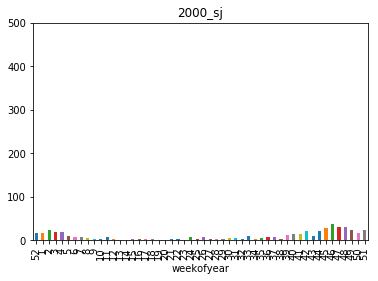

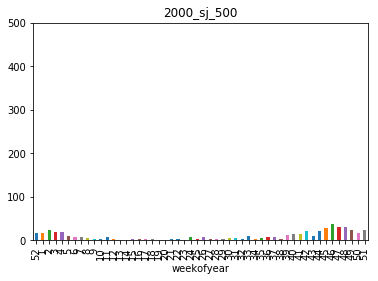

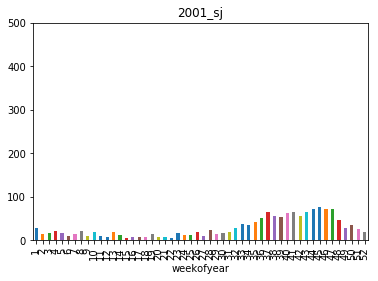

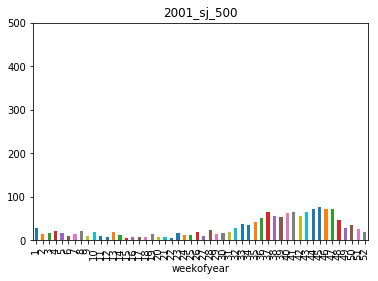

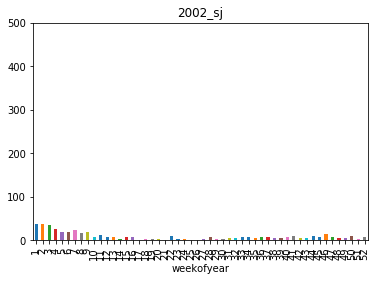

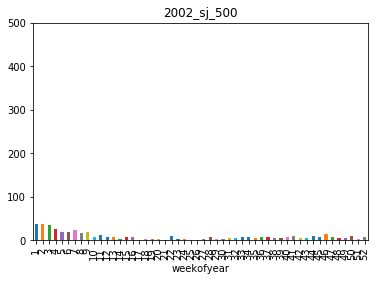

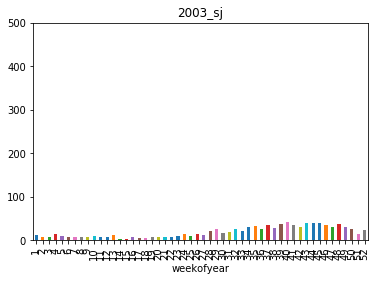

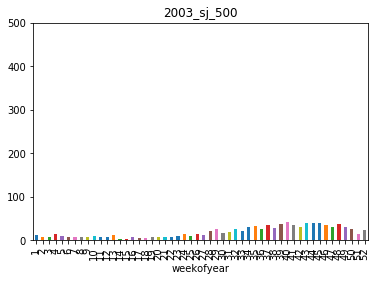

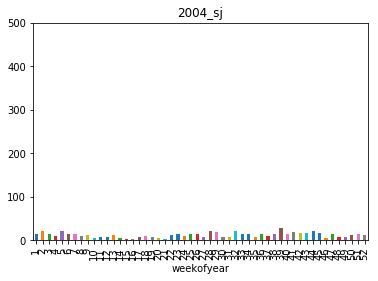

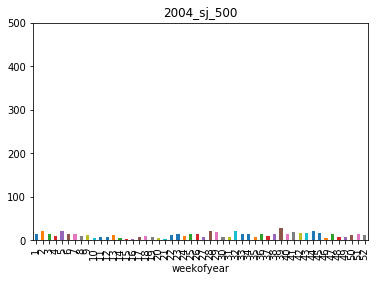

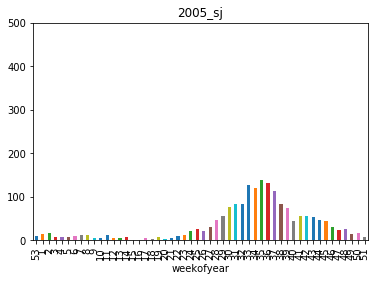

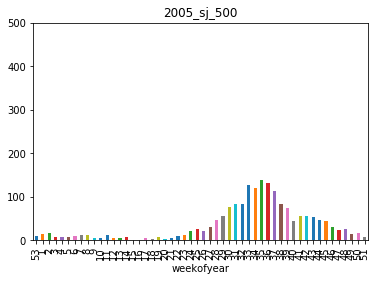

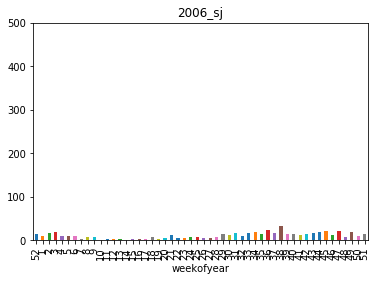

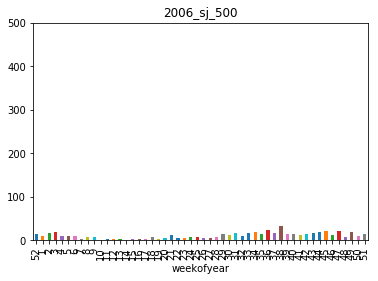

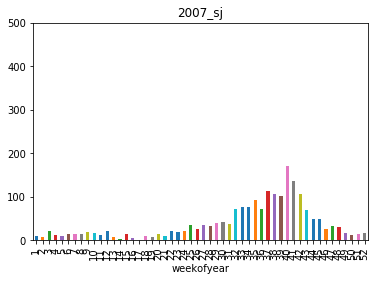

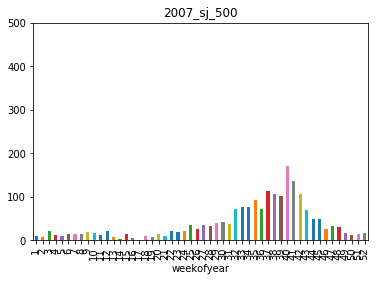

In [11]:
#Plot all years for San Juan with y-scaling to max value over all years
for i in range(1990,2008):
    extract_year_ylim(i,'sj',(0,500))
    extract_year_ylim_save(i,'sj',(0,500),'500')

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
G:\Anaconda\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


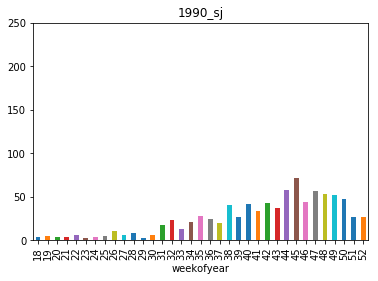

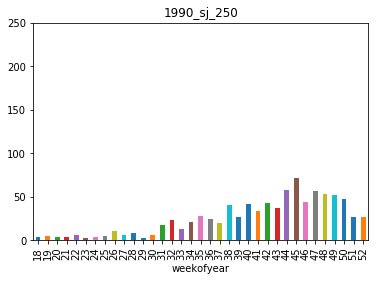

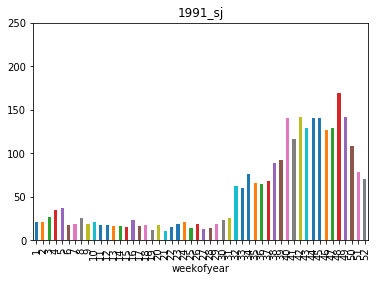

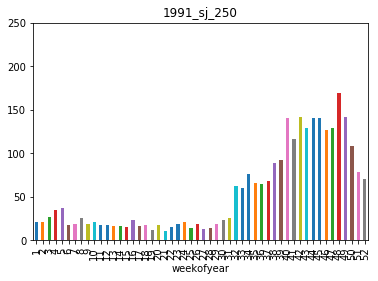

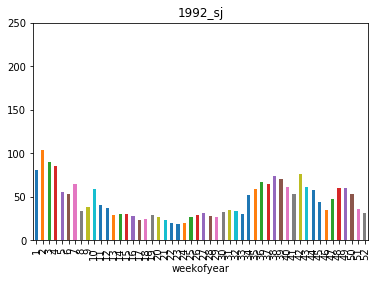

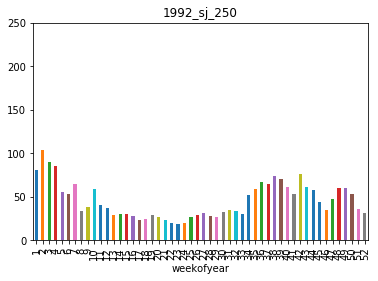

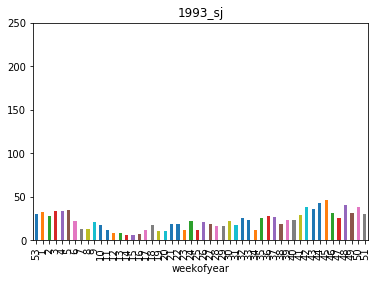

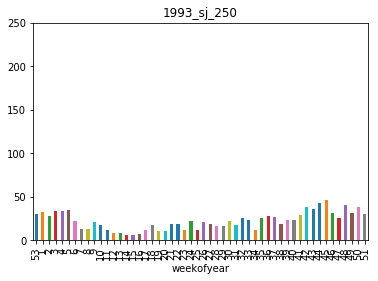

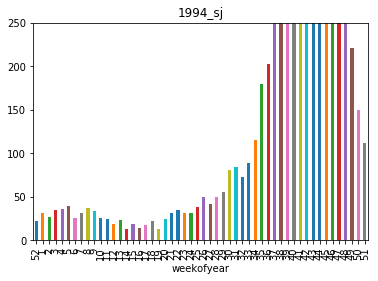

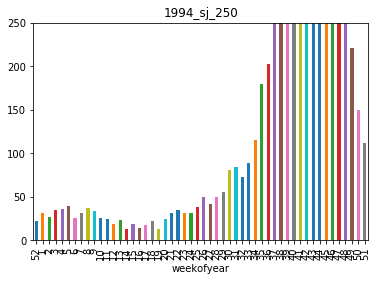

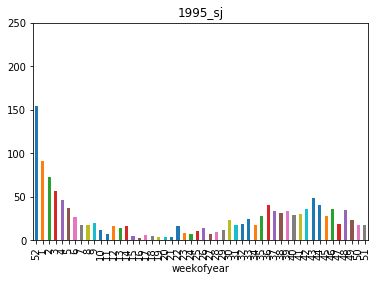

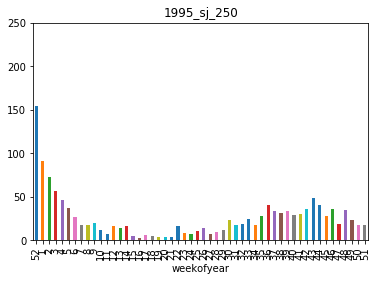

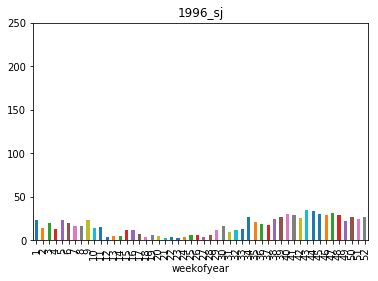

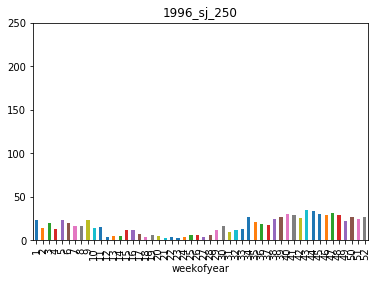

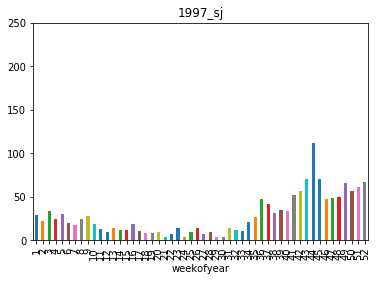

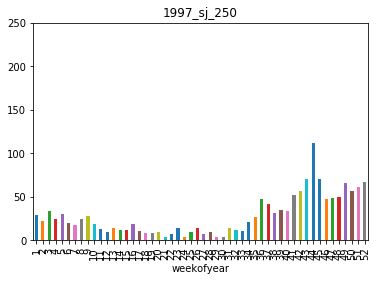

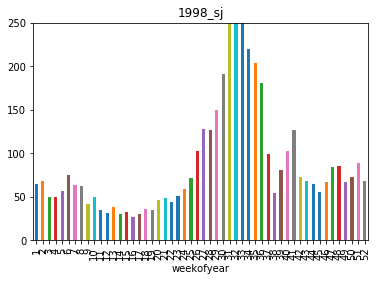

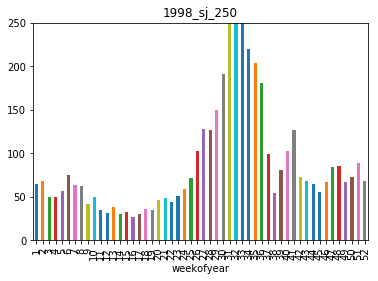

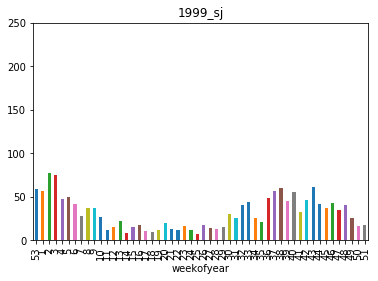

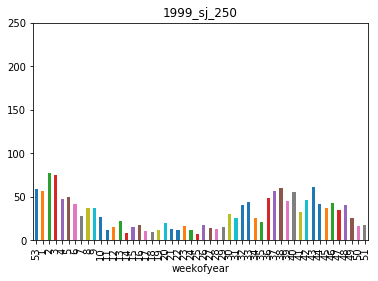

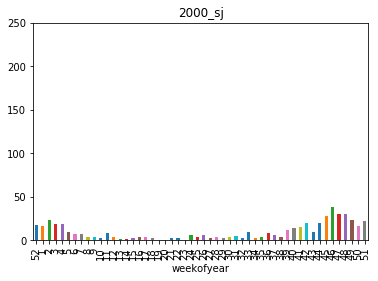

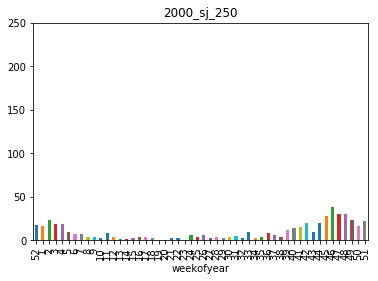

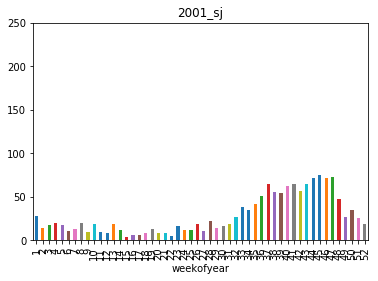

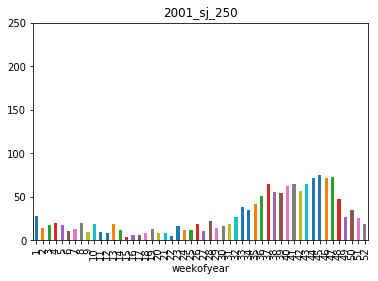

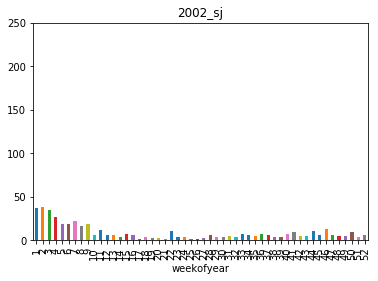

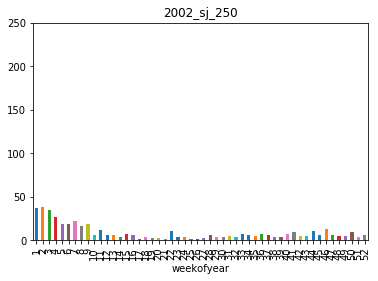

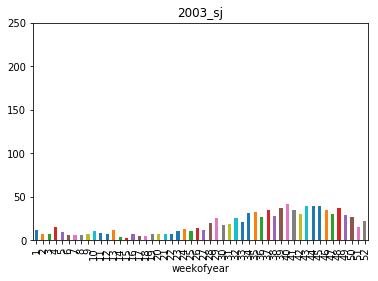

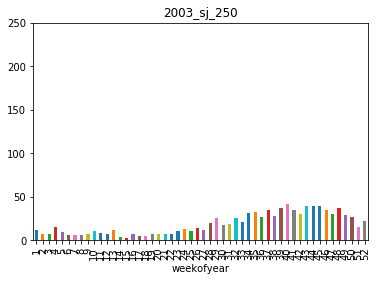

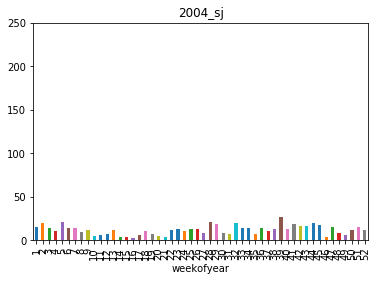

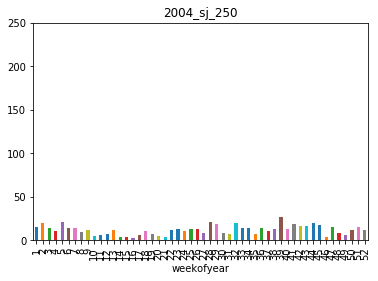

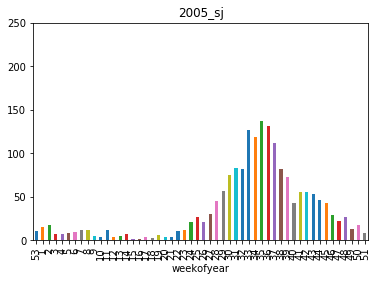

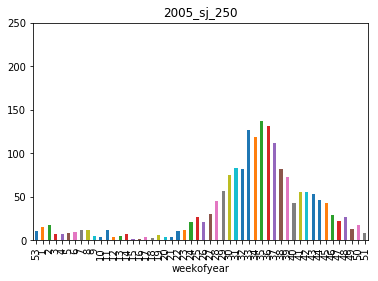

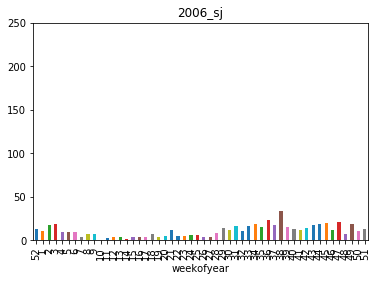

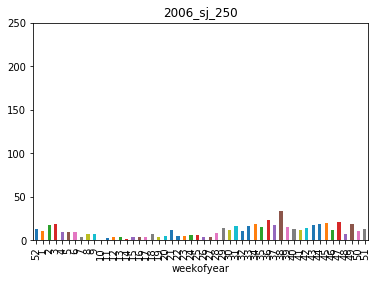

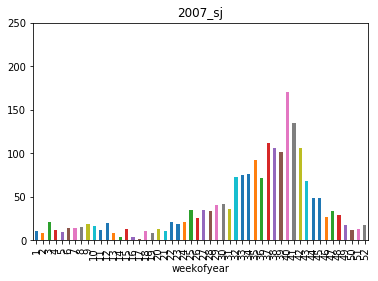

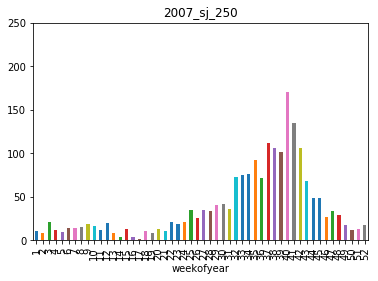

In [12]:
#Plot all years for San Juan with y-scaling to better compare them
for i in range(1990,2008):
    extract_year_ylim(i,'sj',(0,250))
    extract_year_ylim_save(i,'sj',(0,250),'250')

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
G:\Anaconda\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


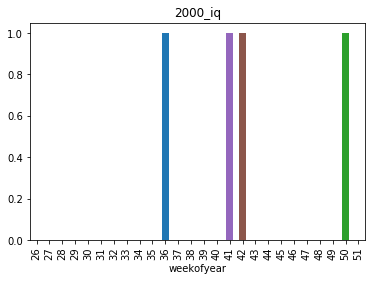

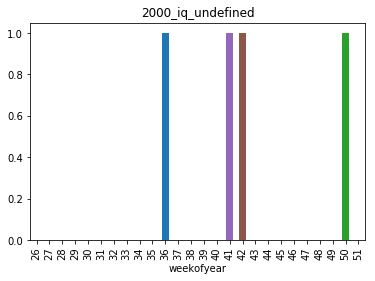

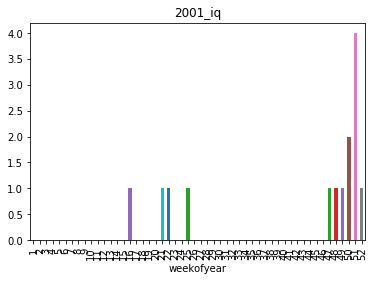

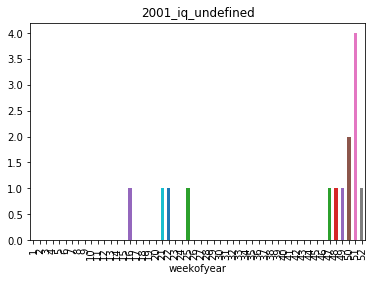

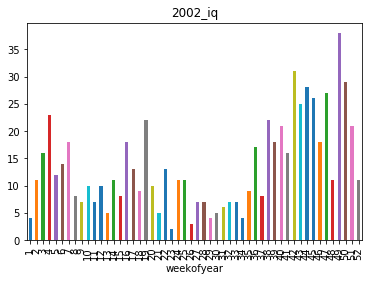

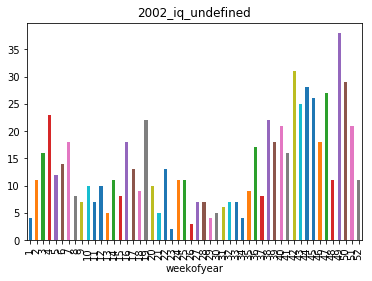

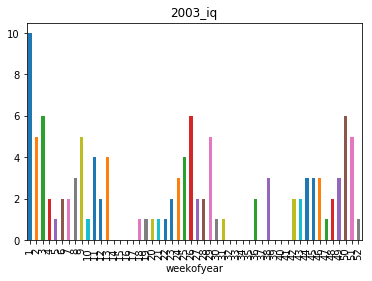

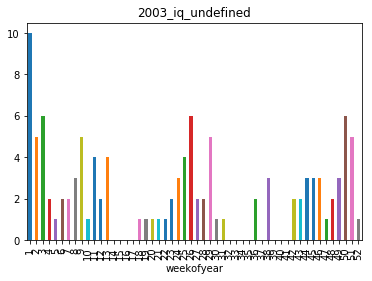

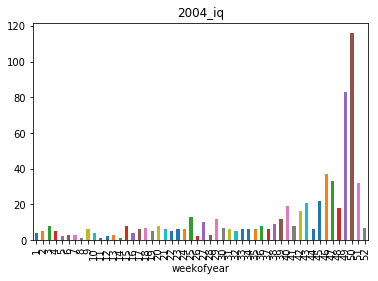

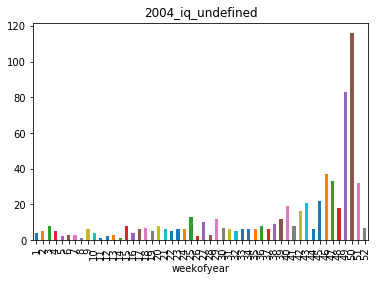

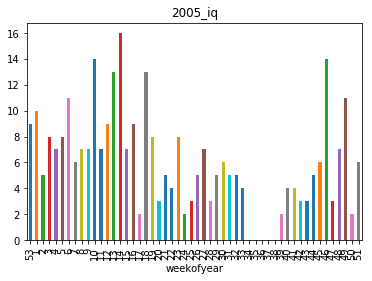

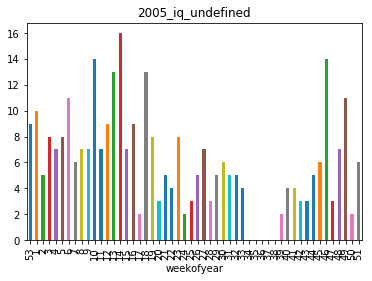

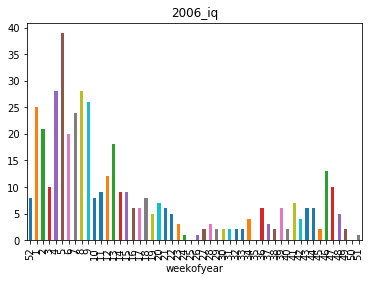

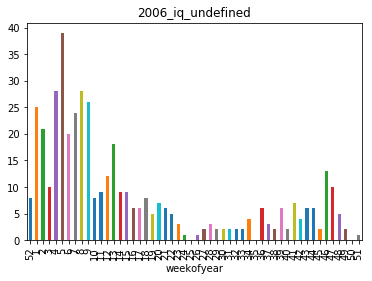

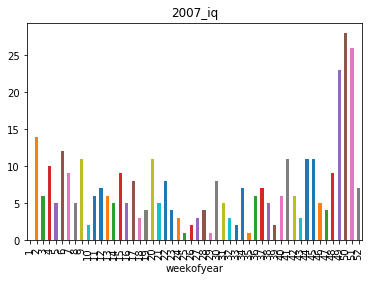

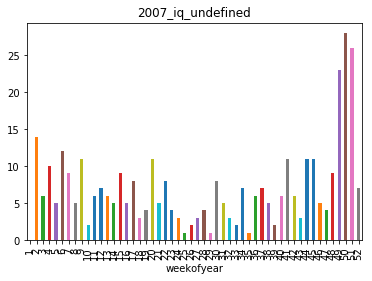

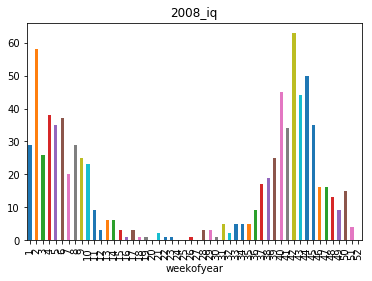

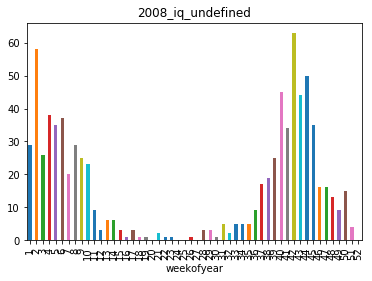

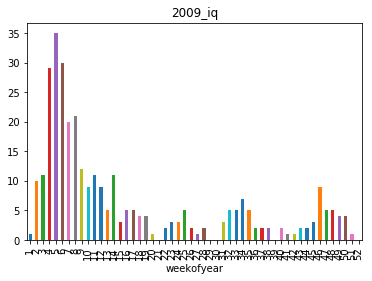

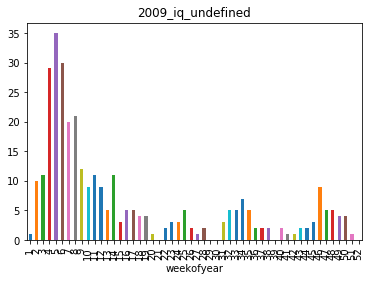

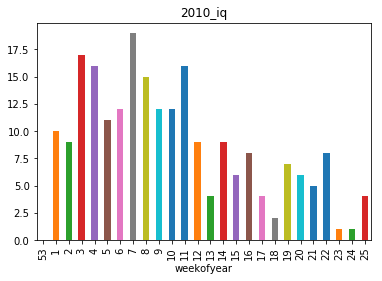

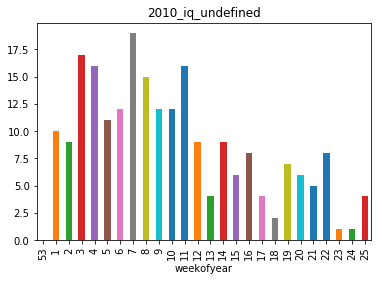

In [13]:
#Plot all years for Iquitos to better compare them
for i in range(2000,2011):
    extract_year(i,'iq')
    extract_year_save(i,'iq','undefined')

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
G:\Anaconda\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


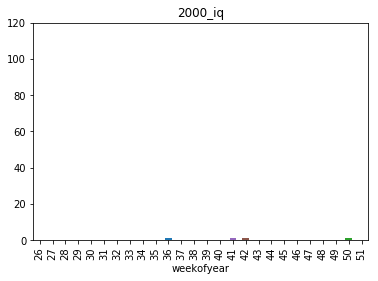

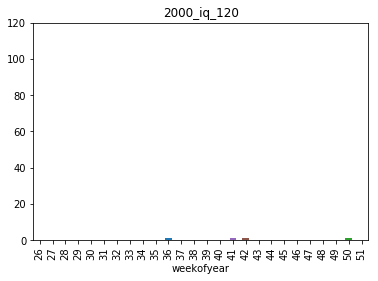

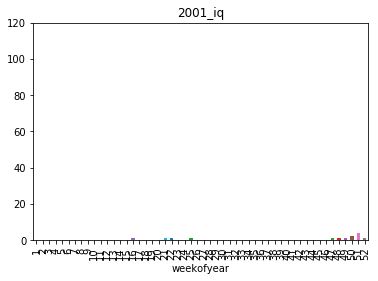

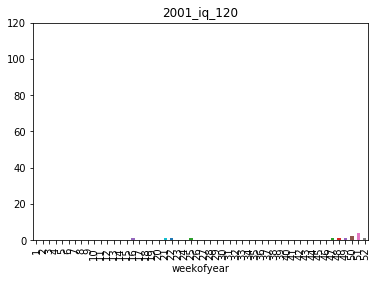

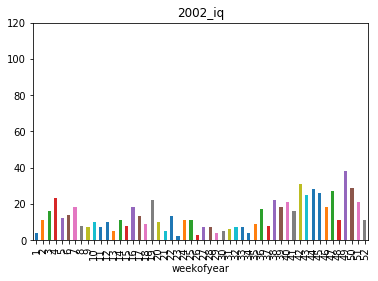

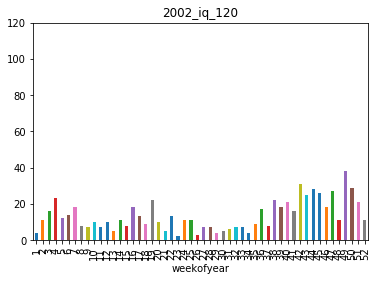

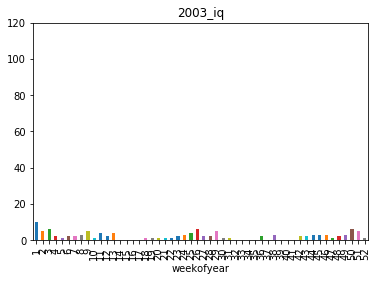

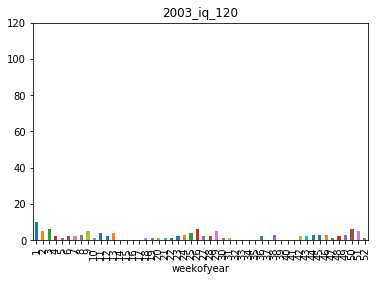

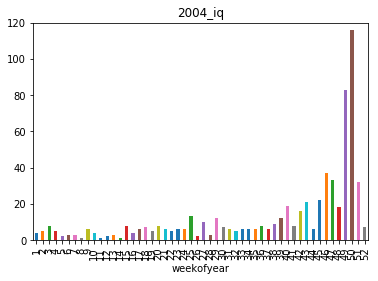

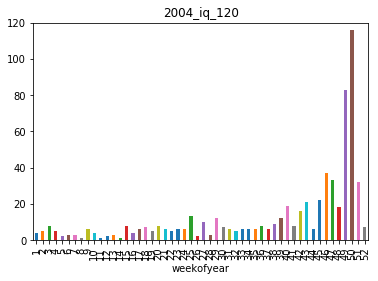

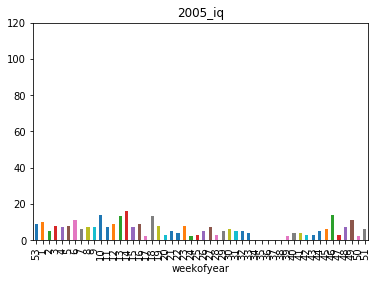

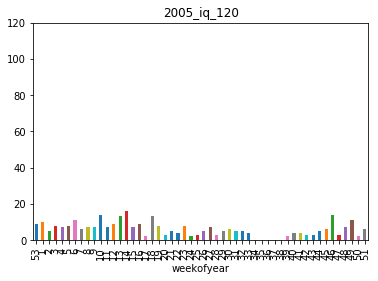

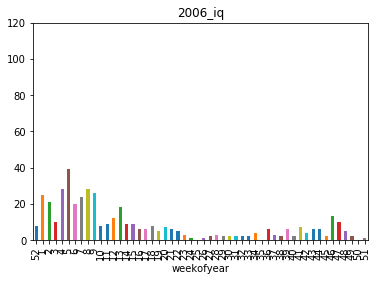

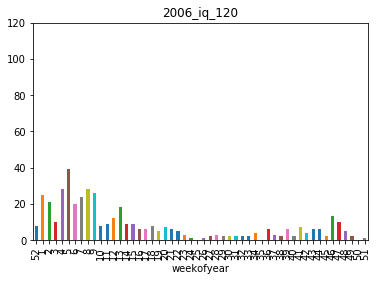

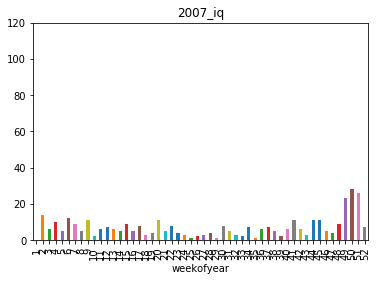

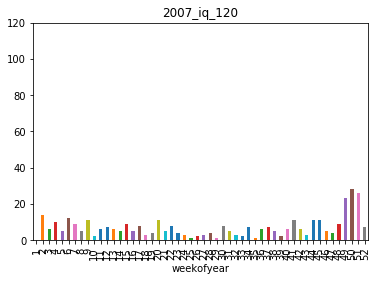

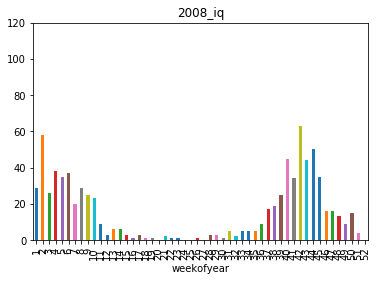

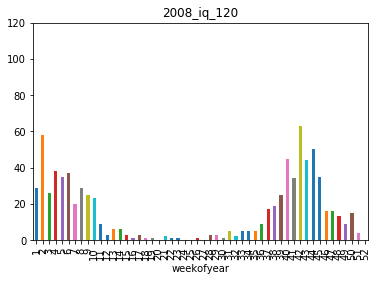

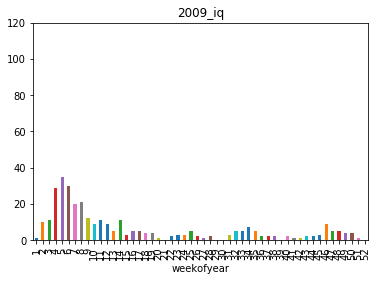

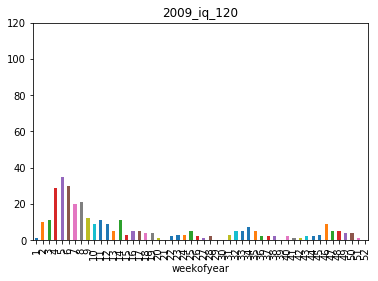

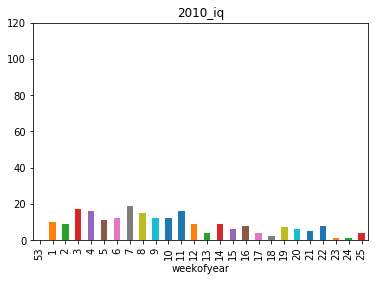

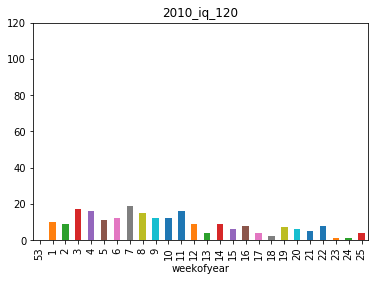

In [14]:
#Plot all years for Iquitos with y-scaling to max value over all years
for i in range(2000,2011):
    extract_year_ylim(i,'iq',(0,120))
    extract_year_ylim_save(i,'iq',(0,120),'120')

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
G:\Anaconda\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


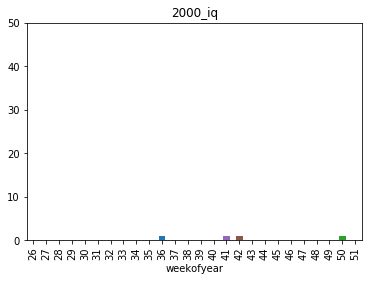

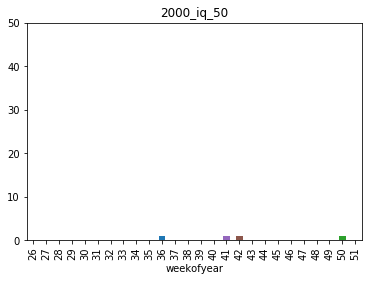

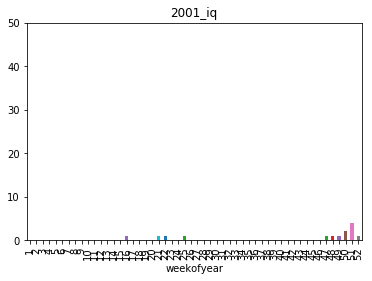

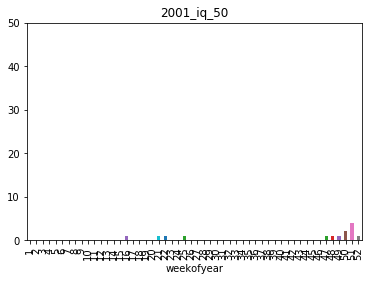

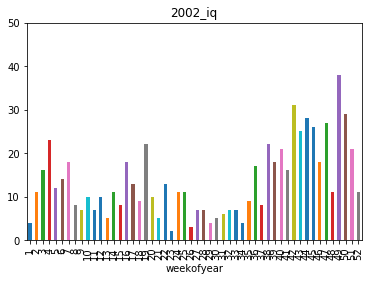

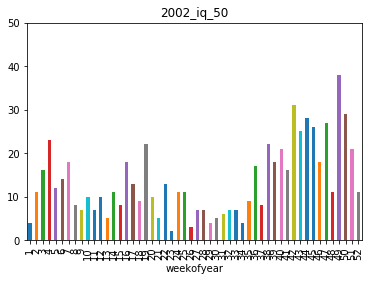

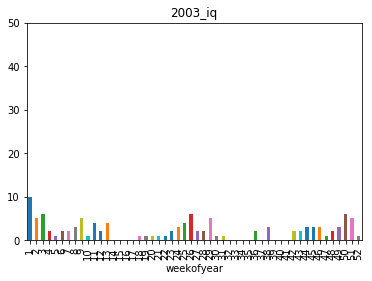

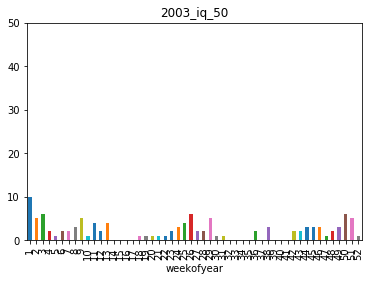

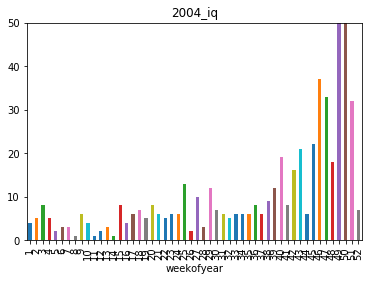

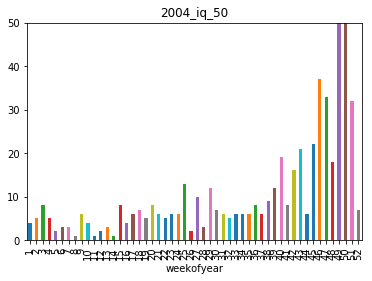

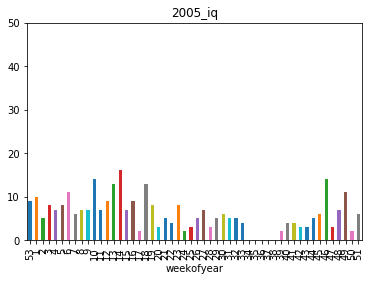

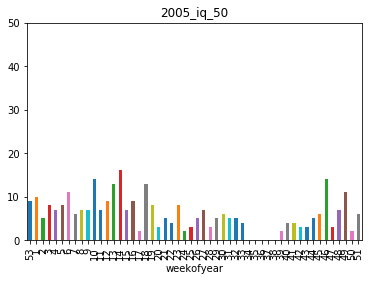

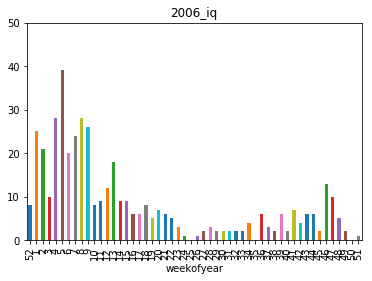

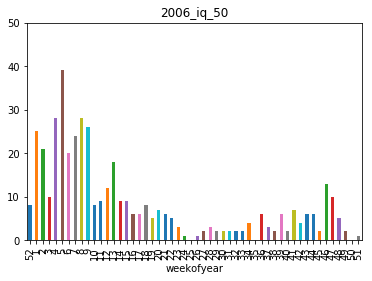

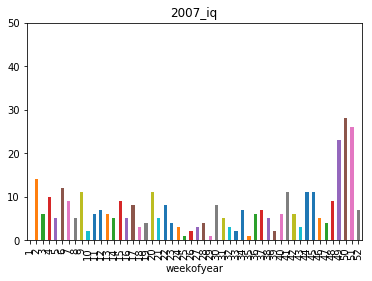

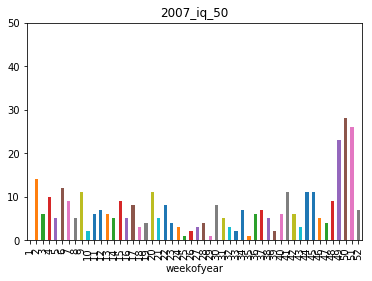

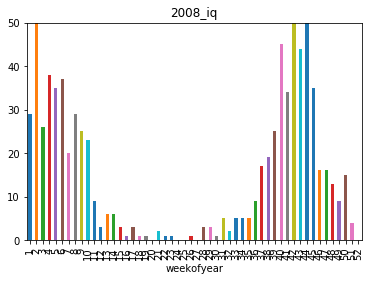

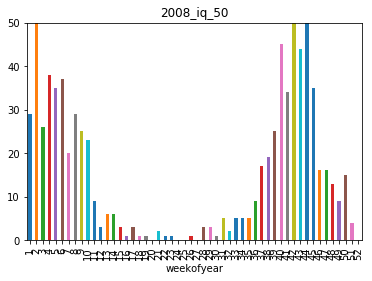

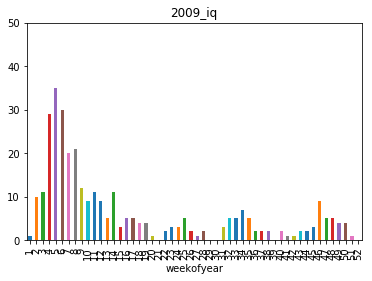

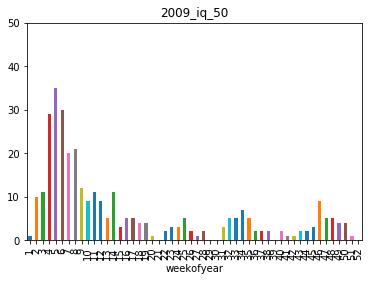

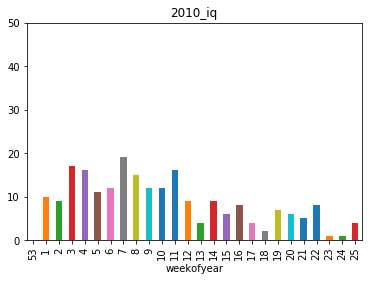

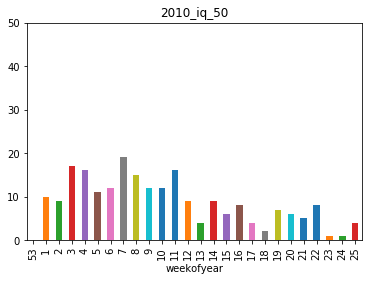

In [15]:
#Plot all years for Iquitos with y-scaling to better compare them
for i in range(2000,2011):
    extract_year_ylim(i,'iq',(0,50))
    extract_year_ylim_save(i,'iq',(0,50),'50')

#### 2.4 How many NaN values are there in the data?

In [16]:
X = pd.read_csv("Input Data/Dengue_Input_Train.csv")
y = pd.read_csv("Input Data/Dengue_Input_Labels.csv")

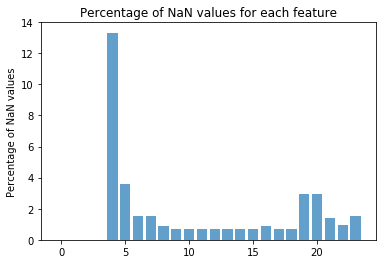

Amount of datapoints 1456


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1


In [17]:
#Plotting label data NaN amount
yaxis = []
for i in X:
    yaxis.append((X[i].isnull().sum()/len(X[i]))*100)
    
xaxis = np.arange(0, len(X.columns))

# Linear scale
plt.bar(xaxis, yaxis, align='center', alpha=0.7)
plt.ylabel('Percentage of NaN values')
plt.title('Percentage of NaN values for each feature')
plt.savefig('NaN_amount.png', bbox_inches='tight')
plt.show()

z_before = 0
for i in X.index:
    z_before += 1
print('Amount of datapoints ' + str(z_before))

X.head(50)

> Decision: Drop feature 4 (ndvi_ne) completly, adopt all others

In [18]:
def transform(X, train = True):
    # Converting the city column into a boolean, since we just have two cities
    is_sj = X.city == 'sj'

    #Extracting weeks from the table, makes a new column for week label, 1 if this week 0 if not
    weeks = X.weekofyear

    # Removing the unnecessary data
    X.drop(['city', 'year', 'weekofyear', 'week_start_date'], axis=1, inplace=True)
    # Remove ndvi_ne because it has to many NaN values
    X.drop('ndvi_ne', axis=1, inplace=True)
    
    if train:
        # Dropping the rows with null values for now
        X.dropna(inplace=True)
    else:
        X.fillna(0,inplace=True)

    # Standardizing the data
    scaler = StandardScaler()
    X[X.columns] = scaler.fit_transform(X)

    # Adding the city boolean column
    X['is_sj'] = is_sj.loc[X.index]

    sliced_weeks = weeks.loc[X.index]
    # Month one hot features
    weeks_features = pd.get_dummies(sliced_weeks)
    X = X.join(weeks_features)
    
    return X

In [19]:
X.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [20]:
# Transforming X values
X = transform(X)
# Selecting y values
y = y.total_cases.loc[X.index]
X.dropna(axis=1)
X.head()

,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,...,43,44,45,46,47,48,49,50,51,52
0,-0.195048,-0.062869,-0.283155,-0.768747,-0.843731,-1.186529,-1.876496,-1.113976,0.051388,-0.190104,...,0,0,0,0,0,0,0,0,0,0
1,0.127228,-0.555894,-0.548368,-0.530069,-0.373007,-0.629435,-0.864541,-0.772669,0.248798,-0.510372,...,0,0,0,0,0,0,0,0,0,0
2,0.385315,-0.626275,-0.364330,-0.261097,0.047170,-0.282673,0.111676,-0.896781,0.604135,-0.324498,...,0,0,0,0,0,0,0,0,0,0
3,0.989635,0.333910,0.415129,-0.701275,0.198812,-0.004126,0.029855,-0.617530,0.485689,-0.602398,...,0,0,0,0,0,0,0,0,0,0
4,1.133241,0.656572,0.552395,-0.881201,0.590556,0.342636,0.366546,-0.462391,0.683099,-0.641122,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Seeing how much of the initial data was preserved
z = 0
for i in X.index:
    z += 1
print(str(round((z*18)/(z_before*19)*100,2)) + '% of the initial data was preserved')

88.03% of the initial data was preserved


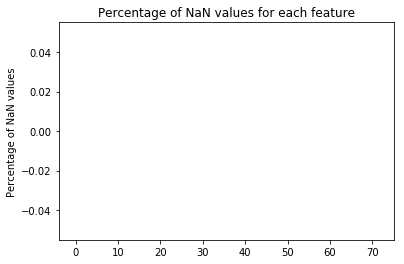

In [22]:
#Plotting label data NaN amount - control(all should be 0)
yaxis = []
for i in X:
    yaxis.append((X[i].isnull().sum()/len(X[i]))*100)
    
xaxis = np.arange(0, len(X.columns))
plt.bar(xaxis, yaxis, align='center', alpha=0.7)
plt.ylabel('Percentage of NaN values')
plt.title('Percentage of NaN values for each feature')
plt.savefig('NaN_amount.png', bbox_inches='tight')
plt.show()

### 3 Data modeling
#### 3.1 Mean modeling as reference

In [23]:
# Splitting of test/train data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, shuffle = False, random_state=42)

In [24]:
# Using numpy full, to make array of length Y_test with all values beeing the mean of the train set
y_p = np.full(len(Y_test), np.mean(Y_train))
print('Y_train mean: ' + str(round(np.mean(Y_train),2)))

Y_train mean: 26.32


In [25]:
print('MAE - mean modeling: '+ str(round(mean_absolute_error(Y_test, y_p),2)))

MAE - mean modeling: 19.65


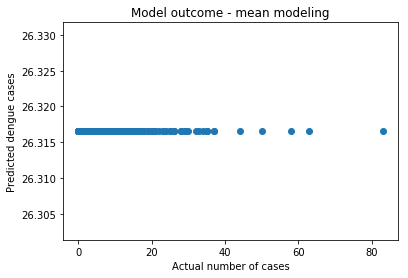

In [26]:
plt.scatter(Y_test, y_p)
plt.xlabel('Actual number of cases')
plt.ylabel('Predicted dengue cases')
plt.title('Model outcome - mean modeling')
plt.savefig('Mean-model.png', bbox_inches='tight')
plt.show()

##### 3.2 Linear regression

In [27]:
lr = LinearRegression()

lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

In [28]:
print('MAE - Linear regression: '+ str(round(mean_absolute_error(Y_test, Y_pred),2)))

MAE - Linear regression: 13.18


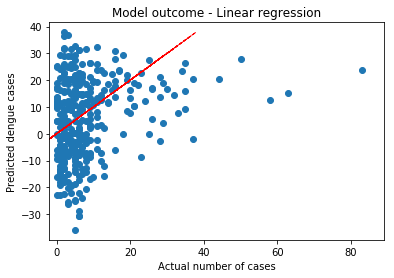

In [29]:
plt.scatter(Y_test, Y_pred)
plt.plot(Y_pred, Y_pred, color='red', linewidth=1, linestyle='--')
plt.xlabel('Actual number of cases')
plt.ylabel('Predicted dengue cases')
plt.title('Model outcome - Linear regression')
plt.xlim(-2)
plt.savefig('Linear-regression.png', bbox_inches='tight')
plt.show()

> Problem: Is predicting negative outcomes. Better suited therefore Poisson regression or Negative binomial regression.

##### 3.3 Ridge regression
Comparing one small alpha value with one large alpha value (http://scikit-learn.org/stable/modules/linear_model.html)
###### 3.3.1 Ridge regression - small alpha

In [30]:
# Using alpha = 0.3 (small value)
reg = linear_model.Ridge (alpha = 0.3)
reg.fit(X_train, Y_train)

Y_pred = reg.predict(X_test)

In [31]:
print('MAE - ridge regression (small alpha): '+ str(round(mean_absolute_error(Y_test, Y_pred),2)))

MAE - ridge regression (small alpha): 12.95


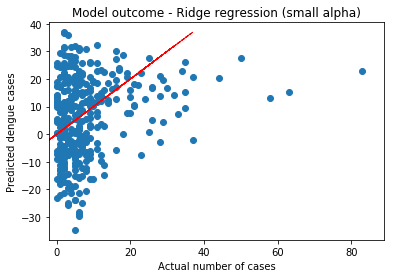

In [32]:
plt.scatter(Y_test, Y_pred)
plt.plot(Y_pred, Y_pred, color='red', linewidth=1, linestyle='--')
plt.xlabel('Actual number of cases')
plt.ylabel('Predicted dengue cases')
plt.title('Model outcome - Ridge regression (small alpha)')
plt.xlim(-2)
plt.savefig('Ridge-regression_small-alpha.png', bbox_inches='tight')
plt.show()

###### 3.3.2 Ridge regression - large alpha

In [33]:
# Using alpha = 10 (large value)
reg = linear_model.Ridge (alpha = 10)
reg.fit(X_train, Y_train)

Y_pred = reg.predict(X_test)

In [34]:
print('MAE - ridge regression (large alpha): '+ str(round(mean_absolute_error(Y_test, Y_pred),2)))

MAE - ridge regression (large alpha): 10.0


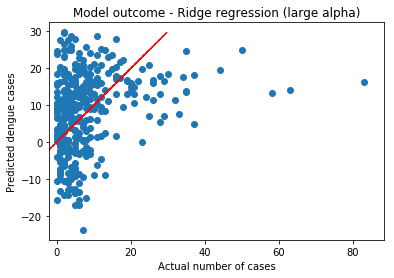

In [35]:
plt.scatter(Y_test, Y_pred)
plt.plot(Y_pred, Y_pred, color='red', linewidth=1, linestyle='--')
plt.xlabel('Actual number of cases')
plt.ylabel('Predicted dengue cases')
plt.title('Model outcome - Ridge regression (large alpha)')
plt.xlim(-2)
plt.savefig('Ridge-regression_large-alpha.png', bbox_inches='tight')
plt.show()

###### 3.3.3 Ridge regression with Cross-Validation of alpha -optimized alpha

In [36]:
test_alphas = [0.001,0.01,0.1,1,2,3,5,10,20,50,100]
reg = linear_model.RidgeCV(alphas=test_alphas)
reg.fit(X_train, Y_train)
reg.alpha_

5.0

In [37]:
# Using alpha = 5 (optimized value)
reg = linear_model.Ridge (alpha = 5)
reg.fit(X_train, Y_train)

Y_pred = reg.predict(X_test)

In [38]:
print('MAE - ridge regression (optimized alpha): '+ str(round(mean_absolute_error(Y_test, Y_pred),2)))

MAE - ridge regression (optimized alpha): 10.83


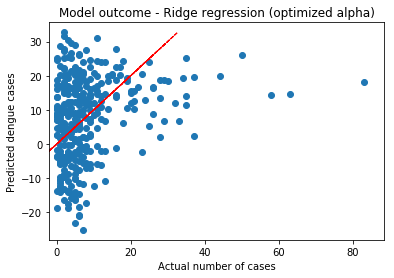

In [39]:
plt.scatter(Y_test, Y_pred)
plt.plot(Y_pred, Y_pred, color='red', linewidth=1, linestyle='--')
plt.xlabel('Actual number of cases')
plt.ylabel('Predicted dengue cases')
plt.title('Model outcome - Ridge regression (optimized alpha)')
plt.xlim(-2)
plt.savefig('Ridge-regression_optimized-alpha.png', bbox_inches='tight')
plt.show()

##### 3.4 Lasso regression

In [40]:
best_score = 99999999
best_alpha = 0.1
alpha_compare = []
alpha_test = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,1,2,3,5,10,20,50,100]
for a in alpha_test:
    reg = linear_model.Lasso(alpha = a)
    reg.fit(X_train, Y_train)

    Y_pred = reg.predict(X_test)
    alpha_compare.append(round(mean_absolute_error(Y_test, Y_pred),2))
    if(mean_absolute_error(Y_test, Y_pred)< best_score):
        best_alpha = a
        best_score = mean_absolute_error(Y_test, Y_pred)

print('Best alpha: ' + str(best_alpha))
reg = linear_model.Lasso(alpha = best_alpha)
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print('MAE - Lasso regression (optimized alpha): '+ str(round(mean_absolute_error(Y_test, Y_pred),2)))

Best alpha: 0.4
MAE - Lasso regression (optimized alpha): 8.98


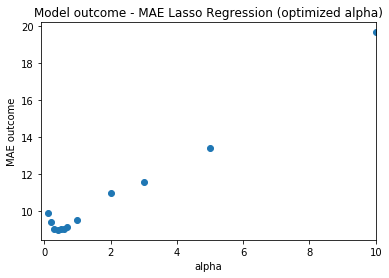

In [41]:
xaxis = alpha_test
yaxis = alpha_compare
plt.scatter(xaxis, yaxis)
plt.xlabel('alpha')
plt.ylabel('MAE outcome')
plt.title('Model outcome - MAE Lasso Regression (optimized alpha)')
plt.xlim(-0.1,10)
plt.savefig('Lasso-regression_MAE-optimized-alpha.png', bbox_inches='tight')
plt.show()

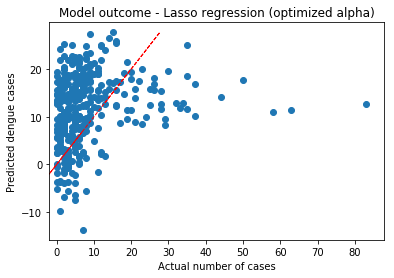

In [42]:
plt.scatter(Y_test, Y_pred)
plt.plot(Y_pred, Y_pred, color='red', linewidth=1, linestyle='--')
plt.xlabel('Actual number of cases')
plt.ylabel('Predicted dengue cases')
plt.title('Model outcome - Lasso regression (optimized alpha)')
plt.xlim(-2)
plt.savefig('Lasso-regression_optimized-alpha.png', bbox_inches='tight')
plt.show()

###### 3.5 Linear regression with recursive feature elimination

In [43]:
estimator = LinearRegression()
MAE_array = []
for n in range(1,18):
    selector = RFE(estimator, n, step=1)
    selector = selector.fit(X_train, Y_train)

    Y_pred = selector.predict(X_test)
    MAE_array.append(round(mean_absolute_error(Y_test, Y_pred),2))
    print('MAE - Linear regression (feature reduction [n='+str(n)+']): '+ str(round(mean_absolute_error(Y_test, Y_pred),2)))


MAE - Linear regression (feature reduction [n=1]): 23.78
MAE - Linear regression (feature reduction [n=2]): 23.92
MAE - Linear regression (feature reduction [n=3]): 10.35
MAE - Linear regression (feature reduction [n=4]): 10.65
MAE - Linear regression (feature reduction [n=5]): 10.88
MAE - Linear regression (feature reduction [n=6]): 11.21
MAE - Linear regression (feature reduction [n=7]): 11.6
MAE - Linear regression (feature reduction [n=8]): 11.85
MAE - Linear regression (feature reduction [n=9]): 12.34
MAE - Linear regression (feature reduction [n=10]): 12.14
MAE - Linear regression (feature reduction [n=11]): 12.57
MAE - Linear regression (feature reduction [n=12]): 12.5
MAE - Linear regression (feature reduction [n=13]): 12.23
MAE - Linear regression (feature reduction [n=14]): 11.95
MAE - Linear regression (feature reduction [n=15]): 12.25
MAE - Linear regression (feature reduction [n=16]): 11.87
MAE - Linear regression (feature reduction [n=17]): 11.69


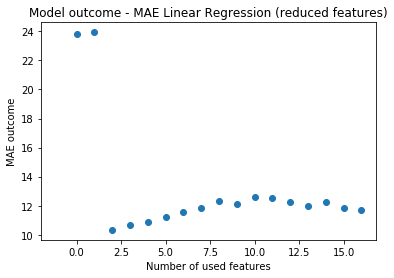

In [44]:
xaxis = np.arange(0, len(MAE_array),1)
yaxis = MAE_array
plt.scatter(xaxis, yaxis)
plt.xlabel('Number of used features')
plt.ylabel('MAE outcome')
plt.title('Model outcome - MAE Linear Regression (reduced features)')
plt.xlim(-2)
plt.savefig('Linear-regression_MAE-comp_reduced-features.png', bbox_inches='tight')
plt.show()

> Result: Best model with n = 3

In [45]:
estimator = LinearRegression()
selector = RFE(estimator, 3, step=1)
selector = selector.fit(X_train, Y_train)

Y_pred = selector.predict(X_test)

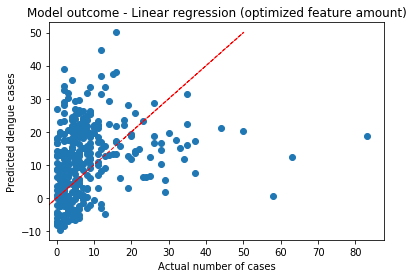

In [46]:
plt.scatter(Y_test, Y_pred)
plt.plot(Y_pred, Y_pred, color='red', linewidth=1, linestyle='--')
plt.xlabel('Actual number of cases')
plt.ylabel('Predicted dengue cases')
plt.title('Model outcome - Linear regression (optimized feature amount)')
plt.xlim(-2)
plt.savefig('Linear-regression_optimized-feature-amount.png', bbox_inches='tight')
plt.show()

In [47]:
print('MAE - Linear regression (feature reduction [n=3]): '+ str(round(mean_absolute_error(Y_test, Y_pred),2)))

MAE - Linear regression (feature reduction [n=3]): 10.35


###### 3.6 Lasso regression with recursive feature elimination

In [48]:
estimator = linear_model.Lasso(alpha = 0.1)
MAE_array = []
for n in range(1,18):
    selector = RFE(estimator, n, step=1)
    selector = selector.fit(X_train, Y_train)

    Y_pred = selector.predict(X_test)
    MAE_array.append(round(mean_absolute_error(Y_test, Y_pred),2))
    print('MAE - Lasso regression (feature reduction [n='+str(n)+']): '+ str(round(mean_absolute_error(Y_test, Y_pred),2)))

MAE - Lasso regression (feature reduction [n=1]): 5.75
MAE - Lasso regression (feature reduction [n=2]): 6.07
MAE - Lasso regression (feature reduction [n=3]): 6.27
MAE - Lasso regression (feature reduction [n=4]): 6.48
MAE - Lasso regression (feature reduction [n=5]): 6.72
MAE - Lasso regression (feature reduction [n=6]): 6.97
MAE - Lasso regression (feature reduction [n=7]): 7.19
MAE - Lasso regression (feature reduction [n=8]): 7.41
MAE - Lasso regression (feature reduction [n=9]): 7.6
MAE - Lasso regression (feature reduction [n=10]): 7.83
MAE - Lasso regression (feature reduction [n=11]): 7.94
MAE - Lasso regression (feature reduction [n=12]): 8.07
MAE - Lasso regression (feature reduction [n=13]): 8.14
MAE - Lasso regression (feature reduction [n=14]): 8.2
MAE - Lasso regression (feature reduction [n=15]): 8.21
MAE - Lasso regression (feature reduction [n=16]): 8.17
MAE - Lasso regression (feature reduction [n=17]): 9.33


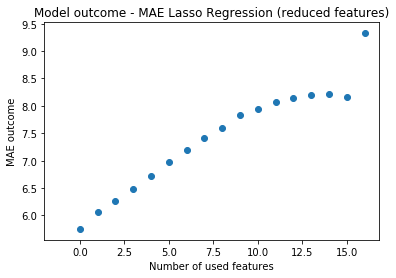

In [49]:
xaxis = np.arange(0, len(MAE_array),1)
yaxis = MAE_array
plt.scatter(xaxis, yaxis)
plt.xlabel('Number of used features')
plt.ylabel('MAE outcome')
plt.title('Model outcome - MAE Lasso Regression (reduced features)')
plt.xlim(-2)
plt.savefig('Lasso-regression_MAE-comp_reduced-features.png', bbox_inches='tight')
plt.show()

In [50]:
estimator = linear_model.Lasso(alpha = 0.1)
selector = RFE(estimator, 2, step=1)
selector = selector.fit(X_train, Y_train)

Y_pred = selector.predict(X_test)

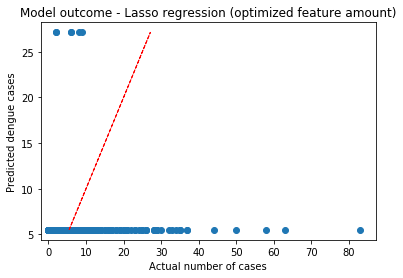

In [51]:
plt.scatter(Y_test, Y_pred)
plt.plot(Y_pred, Y_pred, color='red', linewidth=1, linestyle='--')
plt.xlabel('Actual number of cases')
plt.ylabel('Predicted dengue cases')
plt.title('Model outcome - Lasso regression (optimized feature amount)')

plt.xlim(-2)
plt.savefig('Lasso-regression_optimized-feature-amount.png', bbox_inches='tight')
plt.show()

> Non-sense, therefore -> Linear models not well suited

##### 3.7 XGBoost
Gradient boosting Framework (using Trees), combining weak learners in a way that results in a strong classifier.
Reference: https://xgboost.readthedocs.io/en/latest/model.html
;Code mostly from Susmeet Jan

In [52]:
def impute(X):
    
    # remove the colum that has ~20% null values, also ranks low on feature importance
    X.drop(['ndvi_ne'], axis=1, inplace=True)
    
    # Filling the rest using linear interpolation
    X.interpolate(inplace=True)

def remove_outliers(df):
    return df[(np.abs(stats.zscore(df)) < 5).all(axis=1)]

def mape(Y_test, Y_pred, epsilon = 1):
    return np.mean(np.abs((Y_test - Y_pred + epsilon) / (Y_test + epsilon))) * 100

def extract_month(s):
    return int(s[5:7])

def city_indices(X):
    # city boolean encoding
    return X.city == 'sj'

def pre_process(X, trees = False):
    """
    Extracts the month out of date and converts it to a one hot
    Standardizes the numerical features
    """
    
    #Extracting month from the date
    months = X.week_start_date.apply(extract_month)

    # Removing the columns not required for classification
    X.drop(['city', 'year', 'weekofyear', 'week_start_date'], axis=1, inplace=True)

    # Standardizing the data
    if not trees:
        scaler = StandardScaler()
        X[X.columns] = scaler.fit_transform(X)

    # Month one hot features
    month_features = pd.get_dummies(months)
    X = X.join(month_features)

    # Alternatively use months as a discrete feature
    #X = X.join(months)
    
    return X

def seperate_cities_data(X, is_sj):
    """
    Seperating the data for the two cities in order to create a different model for each
    """

    # Seperating the cities data
    X_sj = X.loc[is_sj]
    X_iq = X.loc[~is_sj]
    
    return X_sj, X_iq

def get_y_labels(X_sj, X_iq, y):    
    
    y = y.total_cases    
    y_sj = y.loc[X_sj.index]
    y_iq = y.loc[X_iq.index]
    
    return y_sj, y_iq

def split(X_sj, X_iq, y_sj, y_iq):

    # train and test split
    sj_split_data = train_test_split(X_sj, y_sj, shuffle = False)
    iq_split_data = train_test_split(X_iq, y_iq, shuffle = False)

    return sj_split_data, iq_split_data

def process(X, y = pd.Series(), train = True, trees = False):
    """
    preprocesses the data
    
    arguements:
    X - the data to be pre processed
    y - labels, optional
    train - if False, computes pre processing for test data set.
    tress - True if the model to be used is a tree based one, for eg. XGBoost
    """
    
    is_sj = city_indices(X)
    if not trees:
        impute(X)
    X = pre_process(X, trees)
    
    #X = remove_outliers(X)
    X_sj, X_iq = seperate_cities_data(X, is_sj)
    if y.empty:
        return X_sj, X_iq
    
    y_sj, y_iq = get_y_labels(X_sj, X_iq, y)
    if not train:
        return X_sj, X_iq, y_sj, y_iq
    
    return split(X_sj, X_iq, y_sj, y_iq)

def general_model(clf, data):
    """
    returns the mean absolute error combined for both the cities.
    """
    (X_sj_train, X_sj_test, Y_sj_train, Y_sj_test), (X_iq_train, X_iq_test, Y_iq_train, Y_iq_test) = data
    
    clf.fit(X_sj_train, Y_sj_train, eval_metric = mean_absolute_error)
    Y_sj_pred = clf.predict(X_sj_test)
    
    clf.fit(X_iq_train, Y_iq_train, eval_metric = mean_absolute_error)
    Y_iq_pred = clf.predict(X_iq_test)
    
    Y_pred = np.concatenate([Y_sj_pred, Y_iq_pred])
    Y_pred = Y_pred.astype(int).clip(0)
    Y_test = Y_sj_test.append(Y_iq_test)
    
    return mean_absolute_error(Y_test, Y_pred)

In [53]:
X = pd.read_csv("Input Data/Dengue_Input_Train.csv")
y = pd.read_csv("Input Data/Dengue_Input_Labels.csv")

In [54]:
data = process(X,y, trees=True)

In [55]:
model = XGBRegressor()
general_model(model, data)
print('MAE - XGB untuned: '+ str(round(general_model(model, data),2)))

MAE - XGB untuned: 18.27


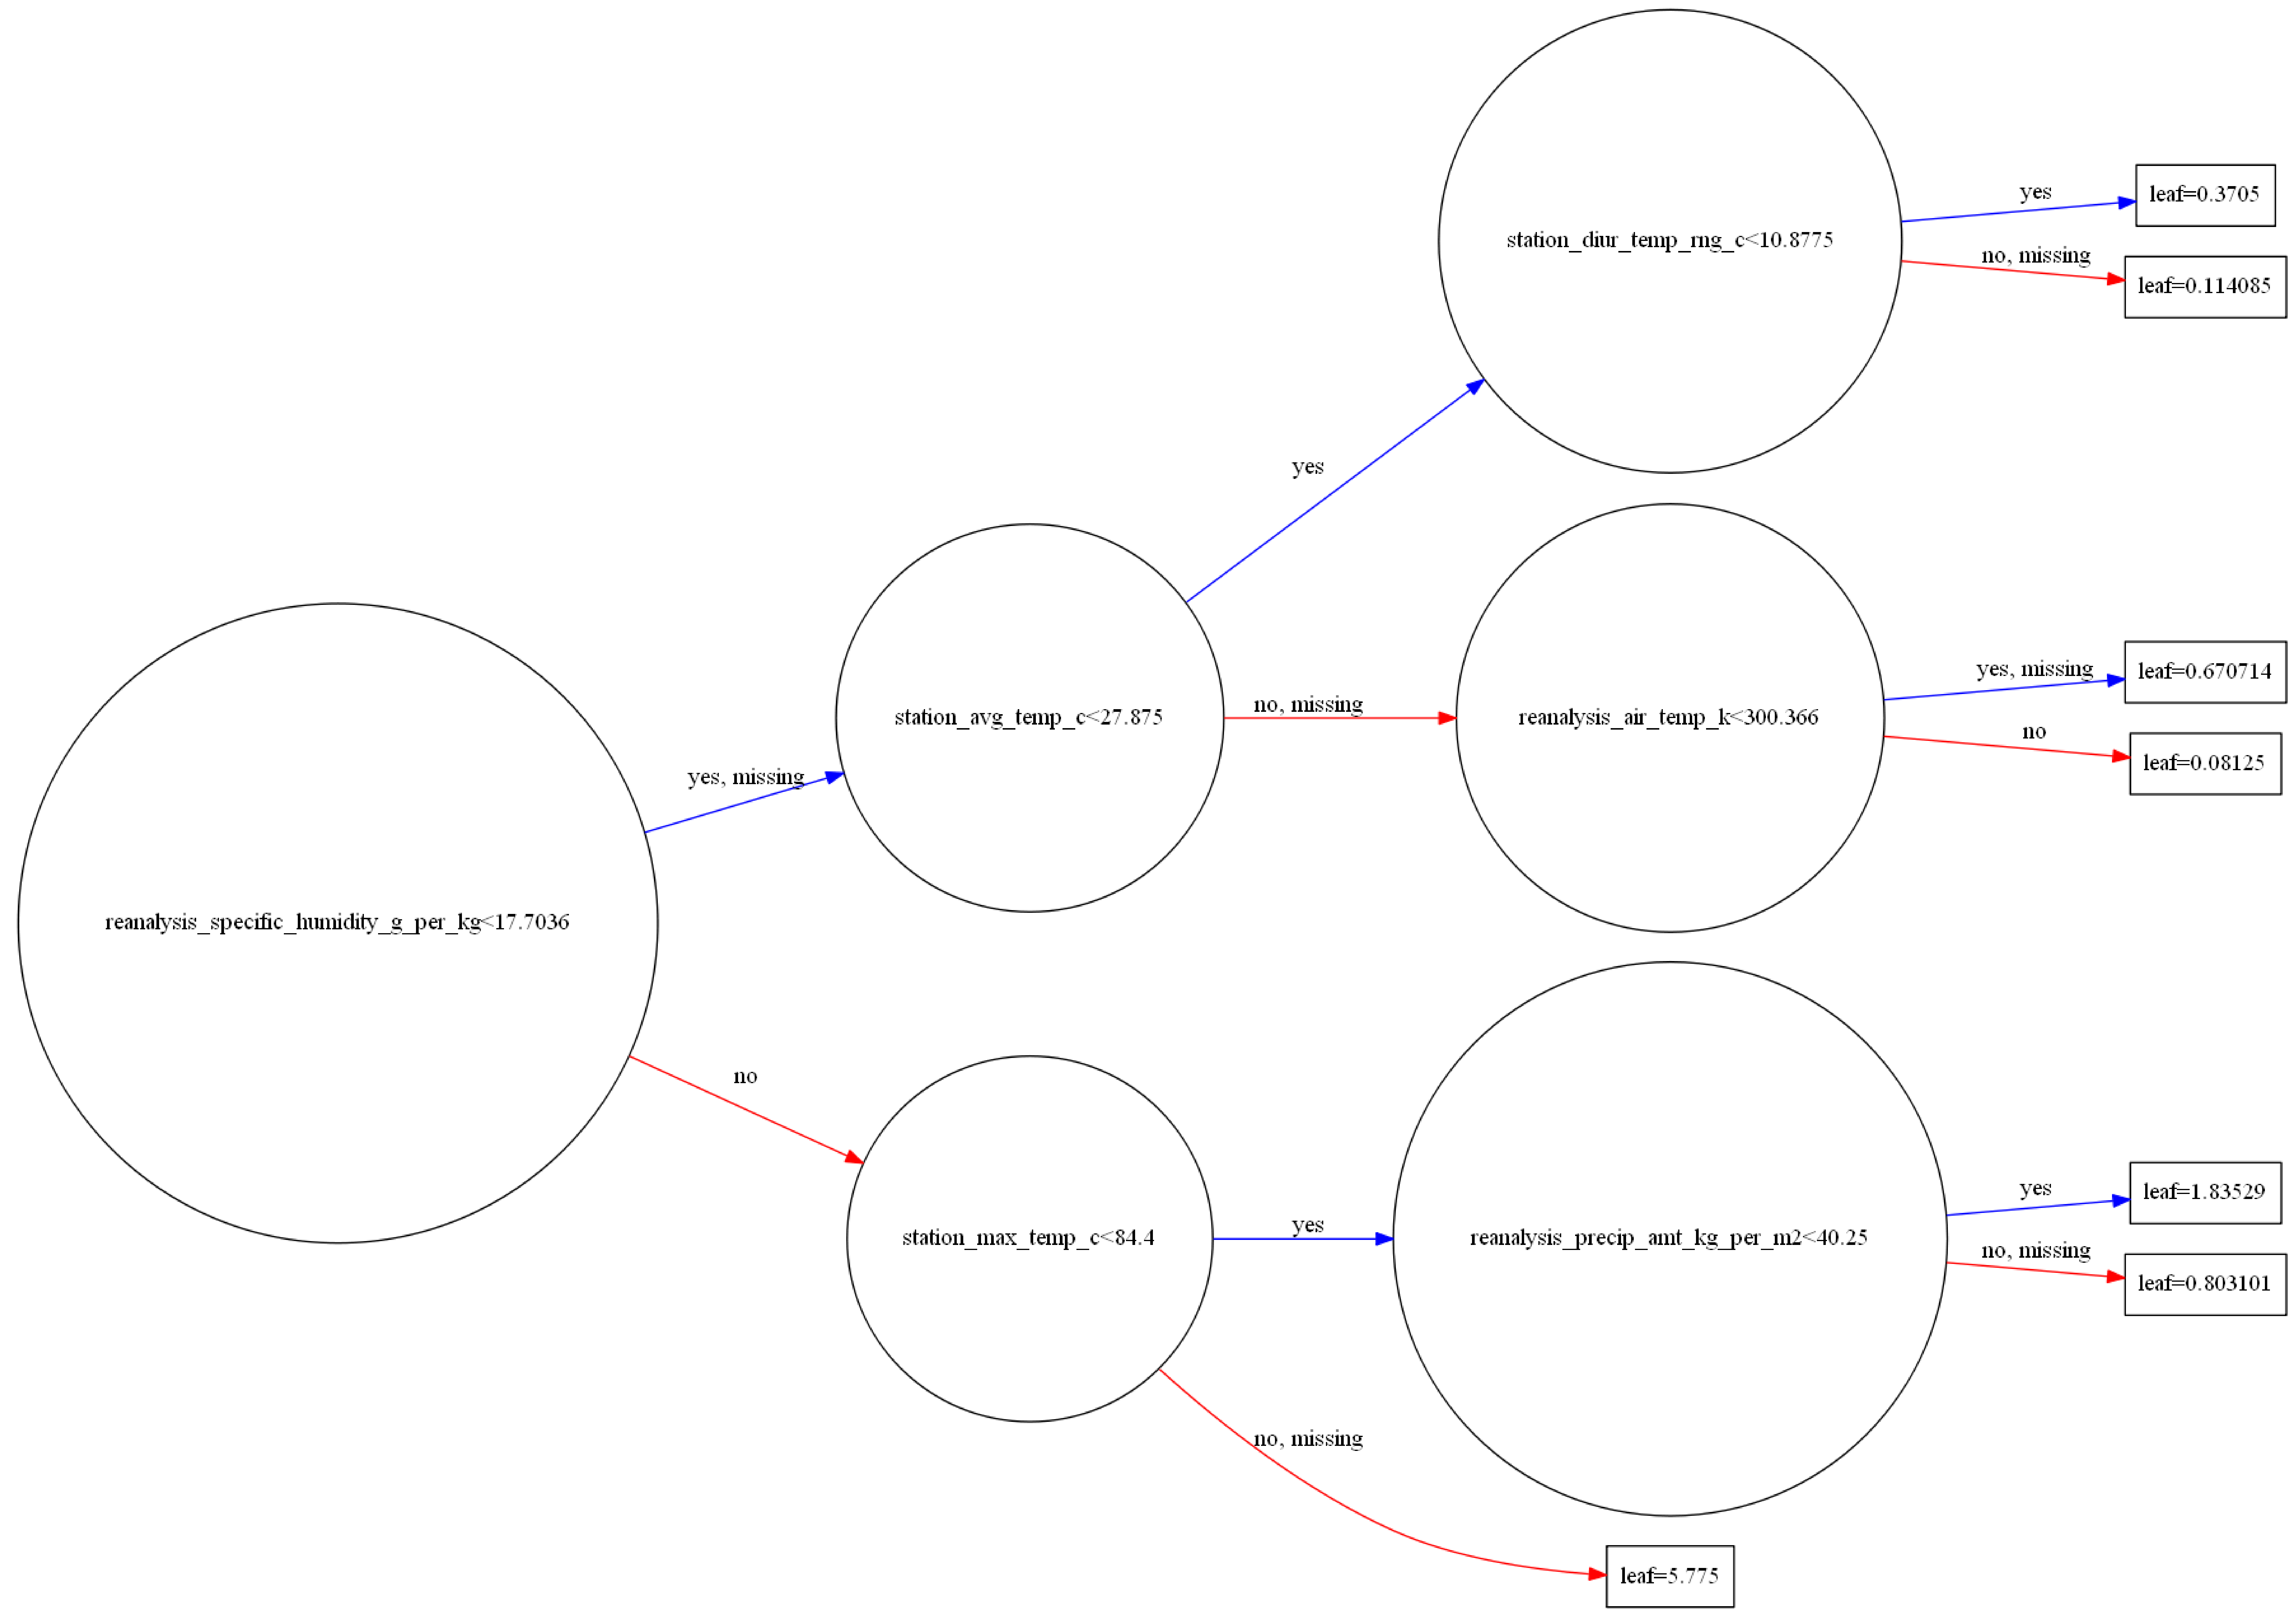

In [56]:
plot_tree(model, num_trees=0, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('XGB-tree-untuned.png')


In [57]:
# we find gamma=0 and max_depth=3, defaut parameters to be best, rest tuned parameters can be seen below
rf = XGBRegressor(n_estimators=55, learning_rate=0.01 ,n_jobs=-1, subsample=0.9, colsample_bytree=0.6, colsample_bylevel=0.1, min_child_weight=5, reg_alpha=0.1) 

general_model(rf, data)

print('MAE - XGB tuned: '+ str(round(general_model(rf, data),2)))

MAE - XGB tuned: 12.39


#### 3.8 Negative Binomial Regression

In [58]:
X = pd.read_csv("Input Data/Dengue_Input_Train.csv")
y = pd.read_csv("Input Data/Dengue_Input_Labels.csv")

In [59]:
def impute(X):
    
    # remove the colum that has ~20% null values, also ranks low on feature importance
    X.drop(['ndvi_ne'], axis=1, inplace=True)
    
    # Filling the rest using linear interpolation
    X.interpolate(inplace=True)

def remove_outliers(df):
    return df[(np.abs(stats.zscore(df)) < 5).all(axis=1)]

def mape(Y_test, Y_pred, epsilon = 1):
    return np.mean(np.abs((Y_test - Y_pred + epsilon) / (Y_test + epsilon))) * 100

def extract_month(s):
    return int(s[5:7])

def city_indices(X):
    # city boolean encoding
    return X.city == 'sj'

def pre_process(X, y, trees = False):
    """
    Extracts the month out of date and converts it to a one hot
    Standardizes the numerical features
    """
    
    #Extracting month from the date
    months = X.week_start_date.apply(extract_month)
    
    #Response coding
#     month = X.week_start_date.apply(extract_month)
#     temp = pd.DataFrame(y.total_cases)
#     temp['month'] = month
#     for name,group in temp.groupby(month):
#         month[group.index] = np.median(group.total_cases)
        
    # Removing the columns not required for classification
    X.drop(['city', 'year', 'weekofyear', 'week_start_date'], axis=1, inplace=True)

    # Standardizing the data
    if not trees:
        scaler = StandardScaler()
        X[X.columns] = scaler.fit_transform(X)

    # Month one hot features
    month_features = pd.get_dummies(months, prefix='m_')
    X = X.join(month_features)

    #Alternatively use response coding 
#     X = X.join(month)
    
    return X

def seperate_cities_data(X, is_sj):

    # Seperating the cities data
    X_sj = X.loc[is_sj]
    X_iq = X.loc[~is_sj]
    
    return X_sj, X_iq

def get_y_labels(X_sj, X_iq, y):    
    
    y = y.total_cases    
    y_sj = y.loc[X_sj.index]
    y_iq = y.loc[X_iq.index]
    
    return y_sj, y_iq

def split(X_sj, X_iq, y_sj, y_iq):

    # train and test split
    sj_split_data = train_test_split(X_sj, y_sj, shuffle = False)
    iq_split_data = train_test_split(X_iq, y_iq, shuffle = False)

    return sj_split_data, iq_split_data

def process(X, y = pd.Series(), train = True, trees = False, feature_selection = 0, time_shift = 0):
    
    is_sj = city_indices(X)
    if not trees:
        impute(X)
    X = pre_process(X, y, trees)
    
    if feature_selection:
        selector = SelectKBest(f_regression, k=feature_selection).fit(X,y.total_cases)
        X = X.loc[:,selector.get_support()]

    #X = remove_outliers(X)
    X_sj, X_iq = seperate_cities_data(X, is_sj)
    if y.empty:
        return X_sj, X_iq
    
    y_sj, y_iq = get_y_labels(X_sj, X_iq, y)
    if time_shift:
        y_sj = y_sj.shift(time_shift).dropna()
        y_iq = y_iq.shift(time_shift).dropna()
        X_sj = X_sj[:-time_shift]
        X_iq = X_iq[:-time_shift]
        
    if not train:
        return X_sj, X_iq, y_sj, y_iq
    
    return split(X_sj, X_iq, y_sj, y_iq)

In [60]:
data = process(X,y)
(X_sj_train, X_sj_test, Y_sj_train, Y_sj_test), (X_iq_train, X_iq_test, Y_iq_train, Y_iq_test) = data

In [61]:
formula = ' + '.join([str(i) for i in list(X_sj_train.columns)])
formula = 'y ~ ' + formula

In [62]:
train_sj = X_sj_train.copy()
train_sj['y'] = Y_sj_train
test_sj = X_sj_test.copy()

model = smf.glm(formula=formula,
                data=train_sj,
                family=sm.families.NegativeBinomial())
model = model.fit()

predictions_sj = model.predict(test_sj).astype(int)
print ("cv error:", mean_absolute_error(predictions_sj, Y_sj_test))

pred_train_sj = model.predict(train_sj).astype(int)
print ("train error:", mean_absolute_error(pred_train_sj, Y_sj_train))

cv error: 22.602564102564102
train error: 25.478632478632477


In [63]:
train_iq = X_iq_train.copy()
train_iq['y'] = Y_iq_train
test_iq = X_iq_test.copy()

model = smf.glm(formula=formula,
                data=train_iq,
                family=sm.families.NegativeBinomial())
results = model.fit()

predictions_iq = results.predict(test_iq).astype(int)
print ("cv error:", mean_absolute_error(predictions_iq, Y_iq_test))

pred_train_iq = results.predict(train_iq).astype(int)
print ("train error:", mean_absolute_error(pred_train_iq, Y_iq_train))

cv error: 8.069230769230769
train error: 5.441025641025641


In [64]:
pred = predictions_iq.append(predictions_sj)
true = Y_iq_test.append(Y_sj_test)
print ("cv error:", mean_absolute_error(pred, true))

train_pred = pred_train_iq.append(pred_train_sj)
train_true = Y_iq_train.append(Y_sj_train)
print ("train error:", mean_absolute_error(train_pred, train_true))

cv error: 17.412087912087912
train error: 18.32234432234432


#### 3.9 Facebook Prophet - Combined data
(Install package with `conda install -c conda-forge fbprophet`, if using anaconda)

In [65]:
X = pd.read_csv("Input Data/Dengue_Input_Train.csv")
y = pd.read_csv("Input Data/Dengue_Input_Labels.csv")
X.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [66]:
y.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [67]:
#Joining the two datasets
Z = pd.merge(X, y,  how='left', left_on=['city','year','weekofyear'], right_on = ['city','year','weekofyear'])

In [68]:
Z.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [69]:
# Get to the format FB Prophet wants
Z = Z[['week_start_date','total_cases']]
# Renaming columns for FBProphet
Z.columns = ['ds', 'y']

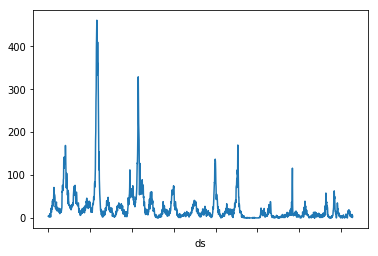

In [70]:
Z.set_index('ds').y.plot()

In [71]:
model = Prophet() #instantiate Prophet
model.fit(Z); #fit the model with your dataframe
Z.head()

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
G:\Anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,y
0,1990-04-30,4
1,1990-05-07,5
2,1990-05-14,4
3,1990-05-21,3
4,1990-05-28,6


In [72]:
number_of_periods = 52 #52weeks of forecasting
future = model.make_future_dataframe(periods=number_of_periods, freq = 'w')
future.tail()

,ds
1503,2011-05-22
1504,2011-05-29
1505,2011-06-05
1506,2011-06-12
1507,2011-06-19


In [73]:
forecast = model.predict(future)

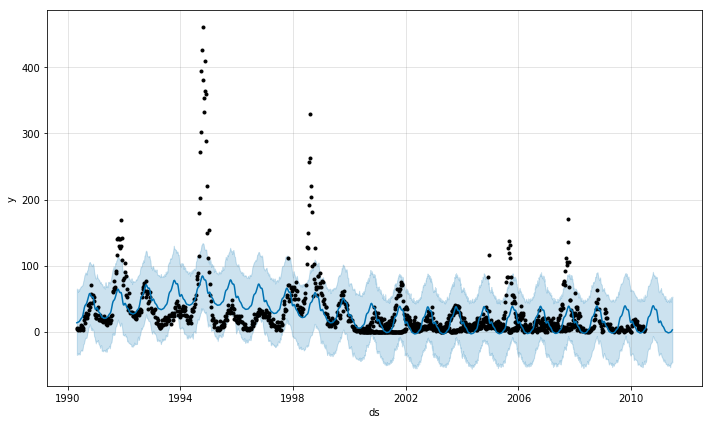

In [74]:
model.plot(forecast);

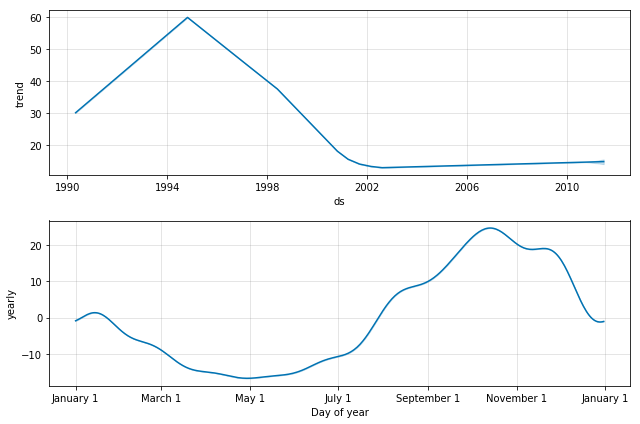

In [75]:
model.plot_components(forecast);  

In [76]:
forecast.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,yearly,yearly_lower,yearly_upper,yhat
0,1990-04-30,30.175051,30.175051,30.175051,-35.011793,65.320389,-16.657501,-16.657501,-16.657501,-16.657501,-16.657501,-16.657501,-16.657501,-16.657501,-16.657501,13.517551
1,1990-05-07,30.302303,30.302303,30.302303,-33.095593,63.515416,-16.469369,-16.469369,-16.469369,-16.469369,-16.469369,-16.469369,-16.469369,-16.469369,-16.469369,13.832933
2,1990-05-14,30.429554,30.429554,30.429554,-34.588113,60.053008,-16.151403,-16.151403,-16.151403,-16.151403,-16.151403,-16.151403,-16.151403,-16.151403,-16.151403,14.278150
3,1990-05-21,30.556805,30.556805,30.556805,-32.115384,64.401096,-15.883389,-15.883389,-15.883389,-15.883389,-15.883389,-15.883389,-15.883389,-15.883389,-15.883389,14.673416
4,1990-05-28,30.684056,30.684056,30.684056,-32.927214,61.952415,-15.536301,-15.536301,-15.536301,-15.536301,-15.536301,-15.536301,-15.536301,-15.536301,-15.536301,15.147755


In [77]:
Z.head()

,ds,y
0,1990-04-30,4
1,1990-05-07,5
2,1990-05-14,4
3,1990-05-21,3
4,1990-05-28,6


In [78]:
Q = pd.merge(Z, forecast,  how='right', left_on=['ds'], right_on = ['ds'])

In [79]:
Q['y'] = Z['y']
Q.dropna(subset=['y'], inplace = True)

In [80]:
Q.tail()

,ds,y,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,yearly,yearly_lower,yearly_upper,yhat
1451,2010-05-28,5.0,14.694139,14.694139,14.694139,-53.817497,48.487290,-15.536301,-15.536301,-15.536301,-15.536301,-15.536301,-15.536301,-15.536301,-15.536301,-15.536301,-0.842162
1452,2010-06-04,8.0,14.698217,14.698217,14.698217,-49.057755,46.376417,-14.812362,-14.812362,-14.812362,-14.812362,-14.812362,-14.812362,-14.812362,-14.812362,-14.812362,-0.114146
1453,2010-06-11,1.0,14.702294,14.702294,14.702294,-48.525851,53.528922,-13.629527,-13.629527,-13.629527,-13.629527,-13.629527,-13.629527,-13.629527,-13.629527,-13.629527,1.072768
1454,2010-06-18,1.0,14.706372,14.706372,14.706372,-43.936902,46.494223,-12.310320,-12.310320,-12.310320,-12.310320,-12.310320,-12.310320,-12.310320,-12.310320,-12.310320,2.396052
1455,2010-06-25,4.0,14.710449,14.710449,14.710449,-49.071087,49.514738,-11.295888,-11.295888,-11.295888,-11.295888,-11.295888,-11.295888,-11.295888,-11.295888,-11.295888,3.414561


In [81]:
print('MAE - Facebook prophet: '+ str(round(mean_absolute_error(Q['y'], Q['yhat']),2)))

MAE - Facebook prophet: 22.44


#### 3.10 PCA

In [82]:
X = pd.read_csv("Input Data/Dengue_Input_Train.csv")
y = pd.read_csv("Input Data/Dengue_Input_Labels.csv")
Z = pd.merge(X, y,  how='left', left_on=['city','year','weekofyear'], right_on = ['city','year','weekofyear'])

In [83]:
def transform(X, train = True):
    # Converting the city column into a boolean, since we just have two cities
    is_sj = X.city == 'sj'

    #Extracting weeks from the table, makes a new column for week label, 1 if this week 0 if not
    weeks = X.weekofyear

    # Removing the unnecessary data
    X.drop(['city', 'year', 'weekofyear', 'week_start_date'], axis=1, inplace=True)
    # Remove ndvi_ne because it has to many NaN values
    X.drop('ndvi_ne', axis=1, inplace=True)
    
    if train:
        # Dropping the rows with null values for now
        X.dropna(inplace=True)
    else:
        X.fillna(0,inplace=True)

    # Standardizing the data
    scaler = StandardScaler()
    X[X.columns] = scaler.fit_transform(X)

    # Adding the city boolean column
    X['is_sj'] = is_sj.loc[X.index]

    sliced_weeks = weeks.loc[X.index]
    # Month one hot features
    weeks_features = pd.get_dummies(sliced_weeks)
    X = X.join(weeks_features)
    
    return X


In [84]:
transform(X)
y = df.loc[:,['total_cases']].values

In [85]:
pca = PCA(n_components=2)

NameError: name 'PCA' is not defined

In [ ]:
principalComponents = pca.fit_transform(X)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
df[['total_cases']].head()
finalDf = pd.concat([principalDf, df[['total_cases']]], axis = 1)
finalDf.head(5)

In [ ]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = finalDf['total_cases']
xdata = finalDf['principal component 1']
ydata = finalDf['principal component 2']

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('Dengue cases')
ax.view_init(elev=35, azim=35)
ax.scatter3D(xdata, ydata, zdata, c=zdata,cmap = 'Paired');

In [ ]:
# Splitting of test/train data
X_train, X_test, Y_train, Y_test = train_test_split(finalDf[['principal component 1','principal component 2']], finalDf['total_cases'], shuffle = False, random_state=42)

In [ ]:
# Run PCA for all possible PCs
pca = PCA().fit(X)

# Define max no. of PC
q = X.shape[1]

# Get cumsum of the PC 1-q
expl_var = pca.explained_variance_ratio_
sum_expl_var = np.cumsum(expl_var)[:q]

In [ ]:
# Plot Feature Importance (both cumul., individual)
plt.figure(figsize=(12, 6))
plt.bar(range(1, q + 1), expl_var, align='center')
plt.xticks(range(1, q + 1, 5))
plt.xlim([0, q + 1])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.step(range(1, 1 + q), sum_expl_var, where='mid')
plt.tight_layout();

#### 3.11 Autocorrelation

In [ ]:
import statsmodels.api as sm
X = pd.read_csv("Input Data/Dengue_Input_Train.csv")
y = pd.read_csv("Input Data/Dengue_Input_Labels.csv")

In [ ]:
#setting a datetime index
y.index = pd.DatetimeIndex(X.week_start_date)

#seperating the data for the 2 cities
sj_cases = y.total_cases[y.city == 'sj']
iq_cases = y.total_cases[y.city == 'iq']

In [ ]:
#weekly sampling
sj_weekly = sj_cases.resample('W').sum()
iq_weekly = iq_cases.resample('W').sum()

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sj_weekly, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sj_weekly, lags=40, ax=ax2)

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(iq_weekly, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(iq_weekly, lags=40, ax=ax2)

In [ ]:
#monthly sampling
sj_monthly = sj_cases.resample('M').sum()
iq_monthly = iq_cases.resample('M').sum()

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sj_monthly, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sj_monthly, lags=40, ax=ax2)

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(iq_monthly, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(iq_monthly, lags=40, ax=ax2)